
# 📊 Análisis Exploratorio de Datos (EDA) - FoodHub

<a href="https://colab.research.google.com/github/Antonio-Tresol/datascience_coursework/blob/main/homework_eda/EDA_FoodHub_Guia_de_Estudio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"> </a>

Este notebook te guiará a través de un análisis exploratorio de datos (EDA) utilizando datos de pedidos de la aplicación **FoodHub**. Aprenderás a inspeccionar, visualizar y comprender los datos paso a paso.

**Objetivo**: Comprender cómo realizar un EDA, en este caso, indagar sobre el comportamiento de los pedidos, los tipos de cocina más populares, los tiempos de entrega y otros aspectos clave, utilizando Python y  bibliotecas como pandas, matplotlib y seaborn.

Se encontrará con ejercicios para que desarrollen en las diferentes secciones.

## Contexto
El número de restaurantes en Nueva York está aumentando día a día. Muchos estudiantes y profesionales ocupados dependen de estos restaurantes debido a sus estilos de vida agitados. El servicio de entrega de comida a domicilio en línea es una excelente opción para ellos, ya que les permite recibir comida de sus restaurantes favoritos.

Una empresa agregadora de comida llamada FoodHub ofrece acceso a múltiples restaurantes a través de una única aplicación móvil.

La app permite que los restaurantes reciban pedidos en línea directamente de los clientes. Una vez que el restaurante confirma el pedido, la aplicación asigna un repartidor de la empresa para recogerlo. El repartidor utiliza un mapa para llegar al restaurante y espera el paquete de comida. Una vez recibido, confirma la recogida en la app y se dirige a la ubicación del cliente para entregar la comida. Al hacer la entrega, también confirma la entrega en la aplicación. El cliente puede calificar el pedido en la app. La empresa agregadora obtiene ingresos cobrando un margen fijo por cada pedido entregado.

## Objetivo del EDA
La empresa agregadora ha almacenado los datos de diferentes pedidos realizados por clientes registrados en su portal en línea. Desean analizar esta información para tener una mejor idea de la demanda de los distintos restaurantes, lo cual les ayudará a mejorar la experiencia del cliente.

Supón que eres un Científico de Datos en FoodHub y que se deben analizar los datos para hacer recomendaciones al negocio. Tu tarea es realizar un análisis de datos para encontrar respuestas que ayuden a la empresa a mejorar su negocio.

In [1]:
# run this if you need to install the dependencies
# %pip install matplotlib seaborn pandas

## 📁 1. Carga de Datos y Exploración Inicial

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
dataset_url = "https://raw.githubusercontent.com/Antonio-Tresol/datascience_coursework/refs/heads/main/homework_eda/foodhub_order.csv"
foodhub_orders_data = pd.read_csv(dataset_url)

foodhub_orders_data.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


## 🔍 2. Entendimiento General del Dataset

In [4]:
print("Filas y columnas:", foodhub_orders_data.shape, end="\n\n")

print("Tipos de datos:")
print(foodhub_orders_data.dtypes, end="\n\n")

print("Valores nulos por columna:")
print(foodhub_orders_data.isnull().sum())

Filas y columnas: (1898, 9)

Tipos de datos:
order_id                   int64
customer_id                int64
restaurant_name           object
cuisine_type              object
cost_of_the_order        float64
day_of_the_week           object
rating                    object
food_preparation_time      int64
delivery_time              int64
dtype: object

Valores nulos por columna:
order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64


In [5]:
# Descripción estadística de los datos
foodhub_orders_data.describe()[
    [
        "cost_of_the_order",
        "food_preparation_time",
        "delivery_time",
    ]
].round(3)

,cost_of_the_order,food_preparation_time,delivery_time
count,1898.000,1898.000,1898.000
mean,16.499,27.372,24.162
std,7.484,4.632,4.973
min,4.470,20.000,15.000
25%,12.080,23.000,20.000
50%,14.140,27.000,25.000
75%,22.298,31.000,28.000
max,35.410,35.000,33.000


### 2.1. Inspección de Datos usando los tipos de datos correctos


Revisamos el ratings como enteros, retirando aquellas ordenes que tiene un rating no dado. Pero primero, veamos cuanto representan los ratings nulos en terminos de filas

In [6]:
number_of_records_without_rating = foodhub_orders_data[
    foodhub_orders_data["rating"] == "Not given"
]["rating"].count()

print(f"number of rows {foodhub_orders_data.shape[0]}")
print(f"number of rows without rating {number_of_records_without_rating}")
print(
    f"Percentage of rows without rating % {(number_of_records_without_rating / foodhub_orders_data.shape[0]) * 100:.2f}"
)

number of rows 1898
number of rows without rating 736
Percentage of rows without rating % 38.78


Sabiendo eso, revisando solo las filas con ratings podemos observar las medidas de tendencia central y de dispersión. 

In [7]:
ratings_without_nulls = foodhub_orders_data[
    foodhub_orders_data["rating"] != "Not given"
]
ratings_without_nulls = ratings_without_nulls[["rating"]]
ratings_without_nulls["rating"] = ratings_without_nulls["rating"].astype(int)
ratings_without_nulls.describe().round(3)

,rating
count,1162.000
mean,4.344
std,0.741
min,3.000
25%,4.000
50%,5.000
75%,5.000
max,5.000


En este set de datos, las columnas order_id, customer_id, restaurant_name, cuisine_type, day_of_the_week are strings, we are going to describe them too

In [8]:
foodhub_orders_data_correct_types = foodhub_orders_data.copy()
str_columns = [
    "order_id",
    "customer_id",
    "restaurant_name",
    "cuisine_type",
    "day_of_the_week",
]

for column in str_columns:
    foodhub_orders_data_correct_types[column] = foodhub_orders_data_correct_types[
        column
    ].astype(str)

foodhub_orders_data_correct_types[str_columns].describe()

,order_id,customer_id,restaurant_name,cuisine_type,day_of_the_week
count,1898,1898,1898,1898,1898
unique,1898,1200,178,14,2
top,1478056,52832,Shake Shack,American,Weekend
freq,1,13,219,584,1351


## 📊 3. Análisis Univariado

### ➤ Categóricas

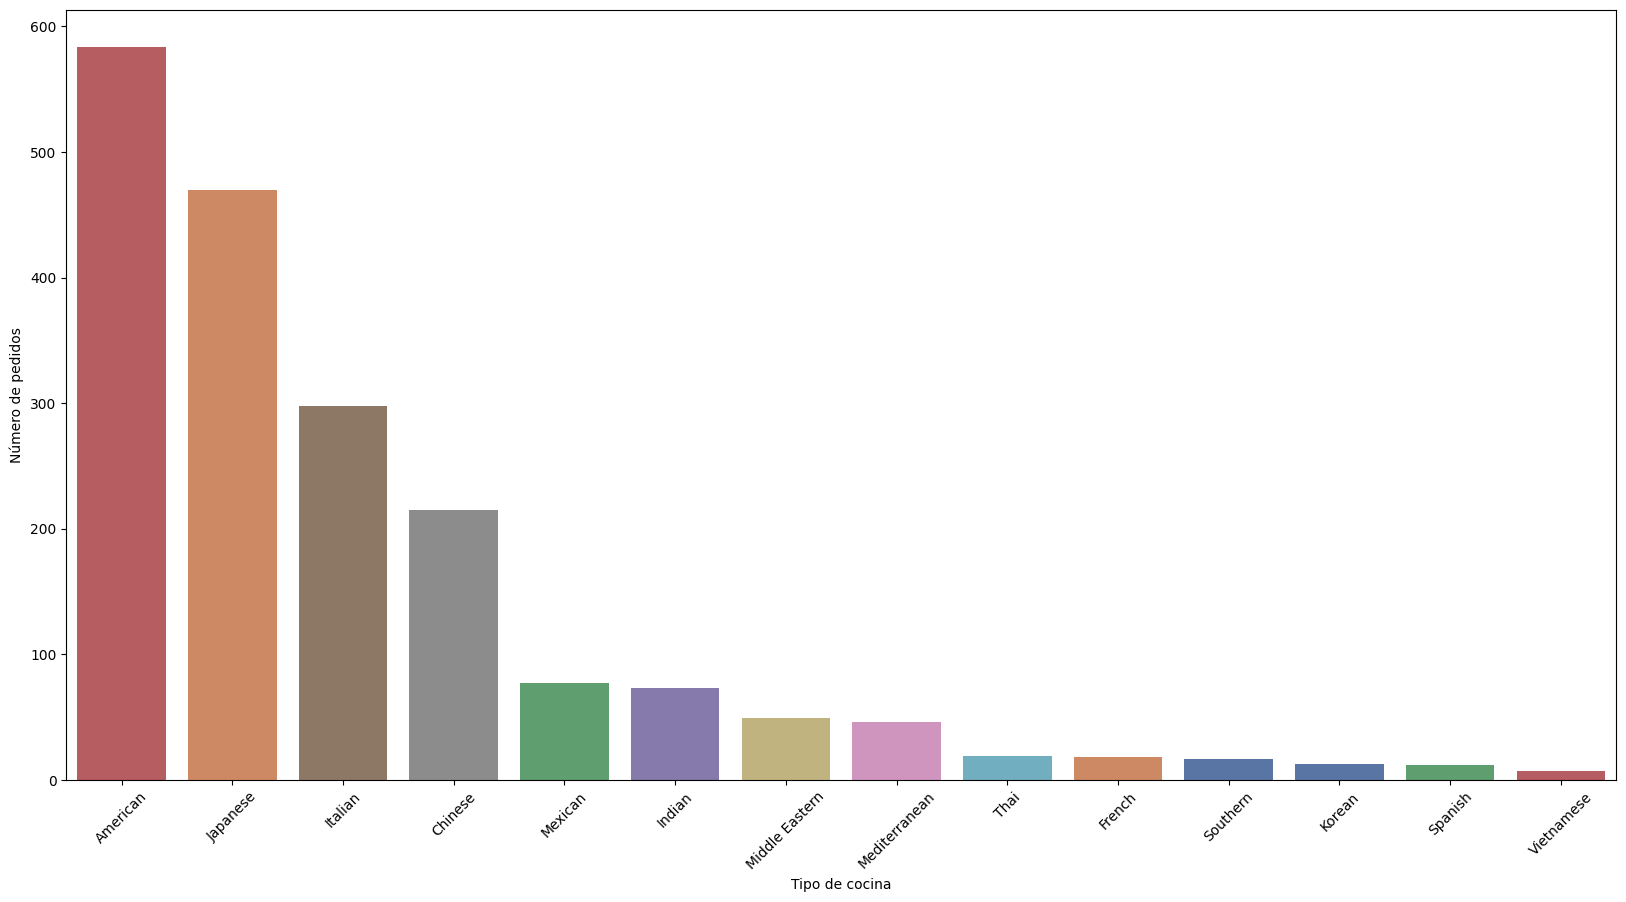

In [9]:
plt.figure(figsize=(20, 10))
bar_order = foodhub_orders_data["cuisine_type"].value_counts().index
sns.countplot(
    data=foodhub_orders_data,
    x="cuisine_type",
    hue="cuisine_type",
    order=bar_order,
    palette="deep",
)
plt.ylabel("Número de pedidos")
plt.xlabel("Tipo de cocina")
plt.xticks(rotation=45)
plt.show()

### 🧪 Ejercicio 1

👉 Crea una gráfica de barras para visualizar los restaurantes con más pedidos.

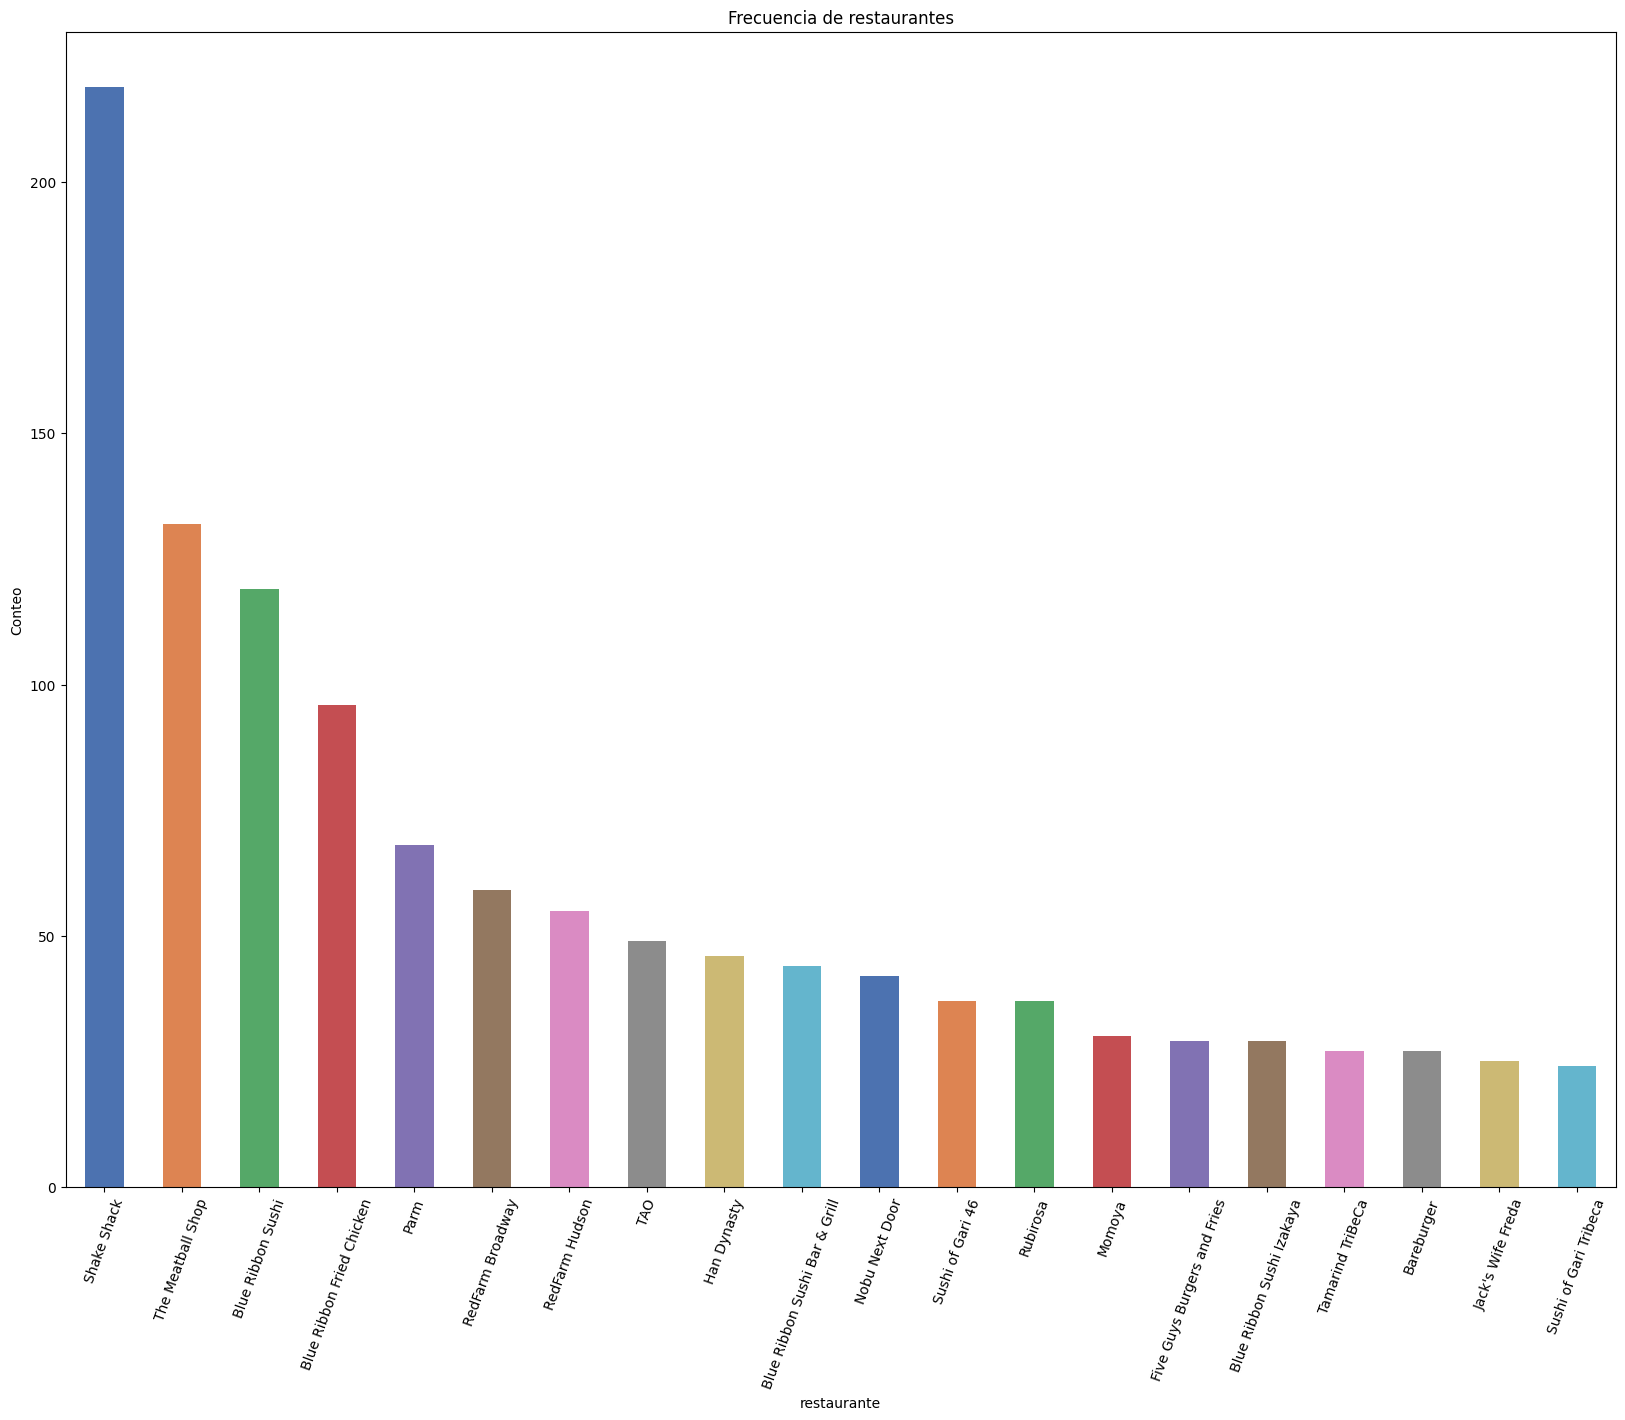

restaurant_name
Shake Shack                              219
The Meatball Shop                        132
Blue Ribbon Sushi                        119
Blue Ribbon Fried Chicken                 96
Parm                                      68
RedFarm Broadway                          59
RedFarm Hudson                            55
TAO                                       49
Han Dynasty                               46
Blue Ribbon Sushi Bar & Grill             44
Nobu Next Door                            42
Sushi of Gari 46                          37
Rubirosa                                  37
Momoya                                    30
Five Guys Burgers and Fries               29
Blue Ribbon Sushi Izakaya                 29
Tamarind TriBeCa                          27
Bareburger                                27
Jack's Wife Freda                         25
Sushi of Gari Tribeca                     24
Chipotle Mexican Grill $1.99 Delivery     23
ilili Restaurant                       

In [10]:
restaurant_order_counts = foodhub_orders_data["restaurant_name"].value_counts()
bar_order = restaurant_order_counts.index
restaurant_order_counts.head(n=20).plot(
    kind="bar",
    figsize=(20, 15),
    title="Frecuencia de restaurantes",
    color=sns.color_palette("deep", n_colors=20),
)
plt.ylabel("Conteo")
plt.xlabel("restaurante")
plt.xticks(rotation=70)
plt.show()
restaurant_order_counts.head(n=30)

### 🧪 Ejercicio 2

👉 Analiza el campo day_of_the_week, cuantos valores tiene, cuál es la distribución de pedidos por esta variable

pedidos entre semana 547, 28.82%
pedidos en fin de semana 1351, 71.18%


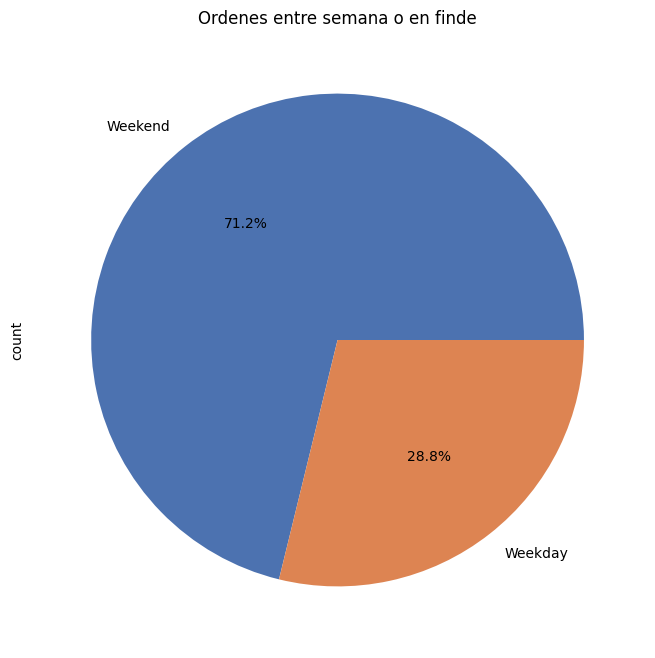

In [11]:
# Escribe tu código aquí
records_in_weekend = foodhub_orders_data[
    foodhub_orders_data["day_of_the_week"] == "Weekend"
].shape[0]

records_in_weekday = foodhub_orders_data.shape[0] - records_in_weekend

print(
    f"pedidos entre semana {records_in_weekday}, {(records_in_weekday / foodhub_orders_data.shape[0]) * 100:.2f}%"
)

print(
    f"pedidos en fin de semana {records_in_weekend}, {(records_in_weekend / foodhub_orders_data.shape[0]) * 100:.2f}%"
)

foodhub_orders_data["day_of_the_week"].value_counts().plot(
    kind="pie",
    autopct="%1.1f%%",  # to add labels to the chart
    figsize=(12, 8),
    title="Ordenes entre semana o en finde",
    colors=sns.color_palette("deep", n_colors=2),
)
plt.show()

### ➤ Numéricas

#### Rating

In [12]:
# Ver cuántas órdenes no tienen rating y cuantas evaluaciones ha recibido cada rating
foodhub_orders_data["rating"].value_counts()

rating
Not given    736
5            588
4            386
3            188
Name: count, dtype: int64

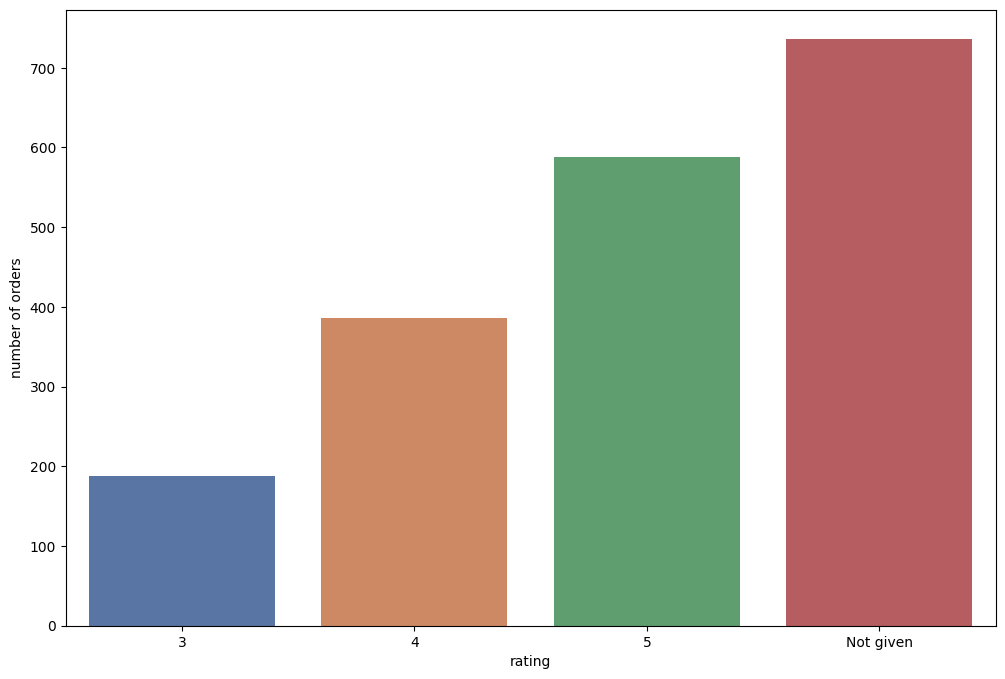

In [13]:
# map "label" -> "color" to use in all plots involving ratings
rating_categories = ["3", "4", "5", "Not given", "1", "2"]
palette_colors = sns.color_palette("deep", n_colors=len(rating_categories))
rating_color_map = dict(zip(rating_categories, palette_colors))

plt.figure(figsize=(12, 8))
sns.countplot(
    data=foodhub_orders_data.sort_values(by="rating"),
    x="rating",
    hue="rating",
    palette=rating_color_map,
)
plt.ylabel("number of orders")
plt.show()

### 🧪 Ejercicio 3

👉 Crea un pie chart para ver el porcentaje de órdenes por cada rating

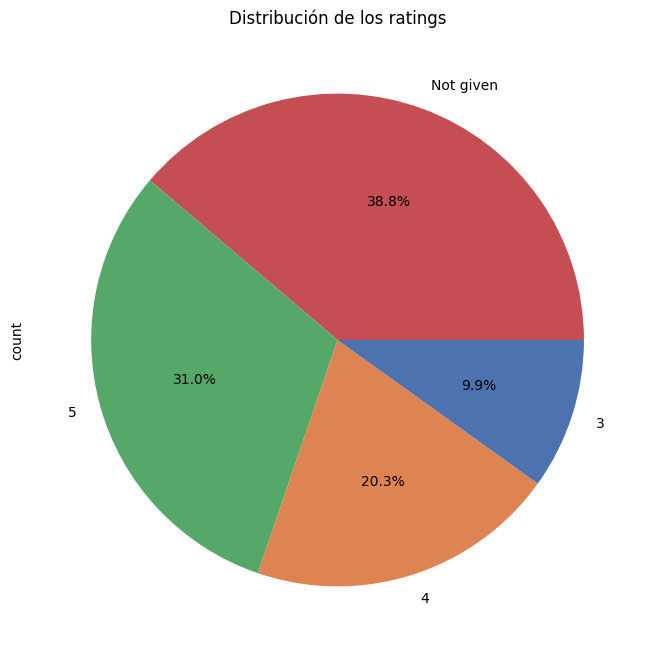

,rating
count,1898
unique,4
top,Not given
freq,736


In [14]:
# matplotlib uses only a list of colors so we get them in order
rating_counts = foodhub_orders_data["rating"].value_counts()
pie_colors = [rating_color_map[rating] for rating in rating_counts.index]

rating_counts.plot(
    kind="pie",
    autopct="%1.1f%%",  # to add labels to the chard
    figsize=(12, 8),
    title="Distribución de los ratings",
    colors=pie_colors,
)
plt.show()
foodhub_orders_data[["rating"]].describe()

#### Costo de Pedidos

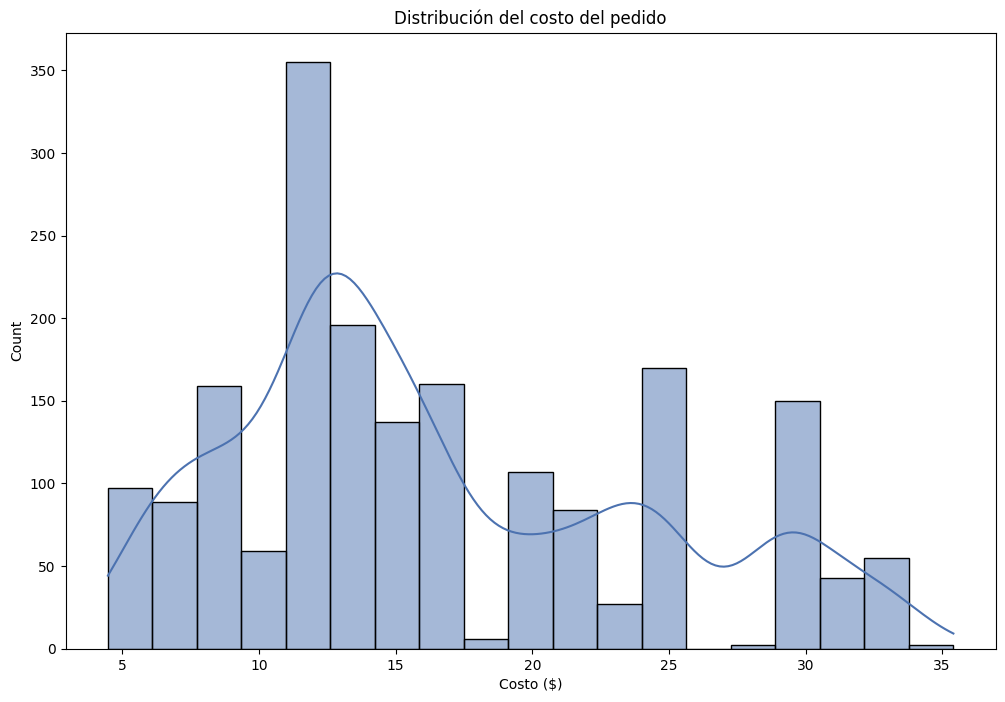

,cost_of_the_order
count,1898.000
mean,16.499
std,7.484
min,4.470
25%,12.080
50%,14.140
75%,22.298
max,35.410


In [15]:
# Ver una distribución del costo de los pedidos.
plt.figure(figsize=(12, 8))
sns.histplot(
    foodhub_orders_data["cost_of_the_order"],
    kde=True,
    color=sns.color_palette("deep")[0],
)
plt.title("Distribución del costo del pedido")
plt.xlabel("Costo ($)")
plt.show()
foodhub_orders_data[["cost_of_the_order"]].describe().round(3)

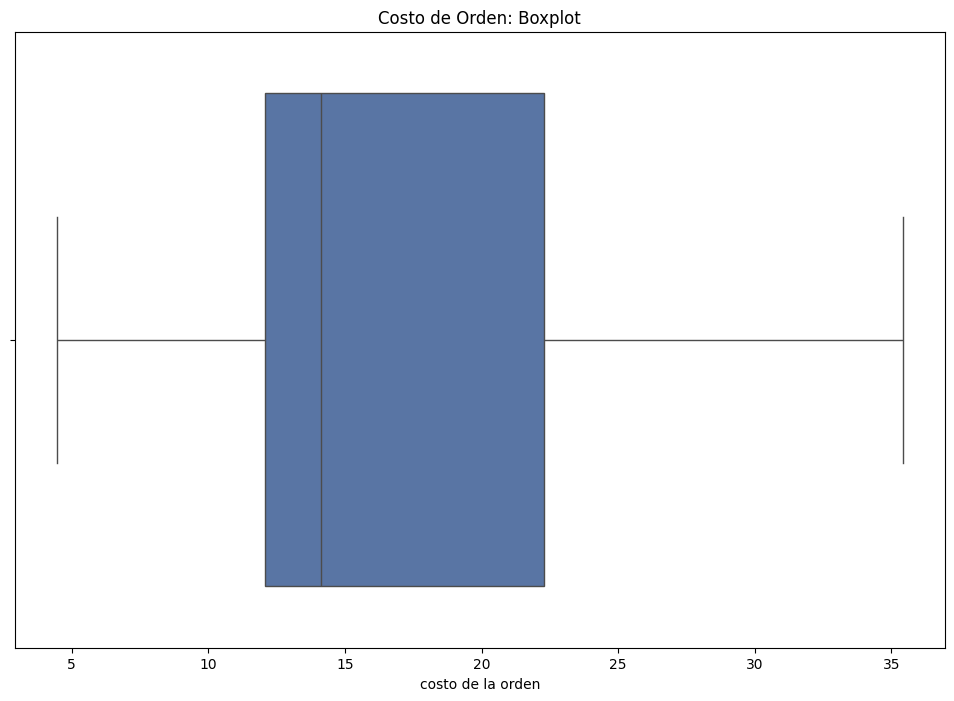

In [16]:
# Gráfico de Caja de Costo de la orden
plt.figure(figsize=(12, 8))
sns.boxplot(
    data=foodhub_orders_data,
    x="cost_of_the_order",
    color=sns.color_palette("deep")[0],
)  ## Boxplot for the cost of order
plt.title("Costo de Orden: Boxplot")
plt.xlabel("costo de la orden")
plt.show()

#### Tiempo de preparación de comida

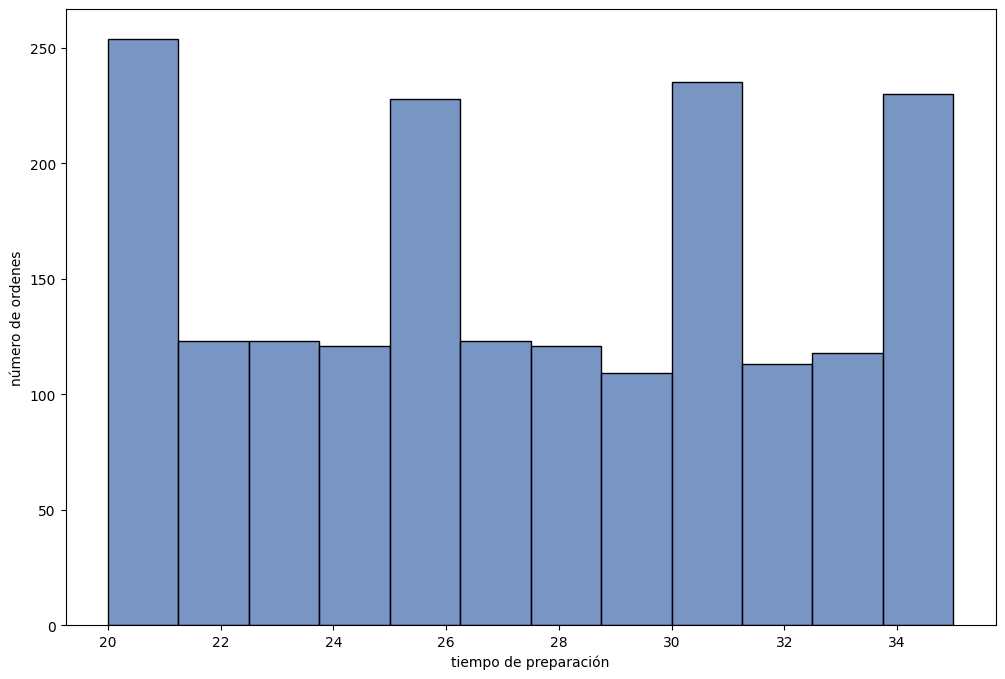

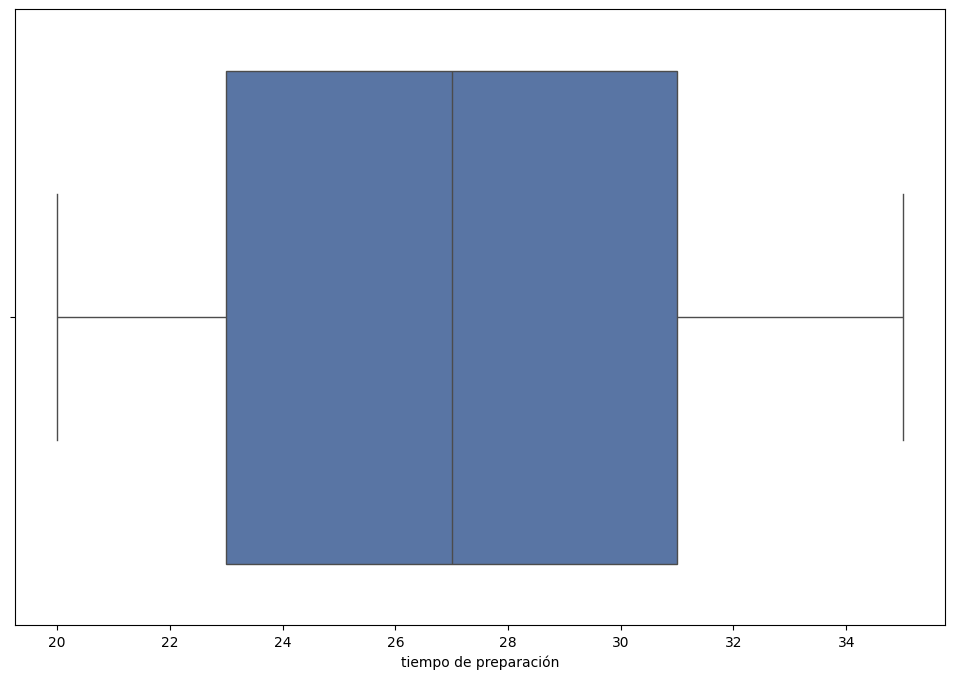

In [17]:
plt.figure(figsize=(12, 8))
sns.histplot(
    data=foodhub_orders_data,
    x="food_preparation_time",
    color=sns.color_palette("deep")[0],
)
plt.ylabel("número de ordenes")
plt.xlabel("tiempo de preparación")
plt.show()

plt.figure(figsize=(12, 8))
sns.boxplot(
    data=foodhub_orders_data,
    x="food_preparation_time",
    color=sns.color_palette("deep")[0],
)
plt.xlabel("tiempo de preparación")
plt.show()

Los picos en el preparation time pueden ser debido a que las personas tienden a rendondear los tiempos (en caso de que estos datos fueran tomados por personas y no por un sistema automatizado).

#### Tiempo de entrega

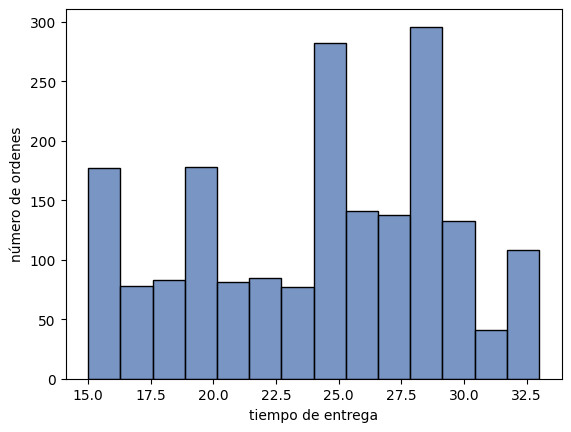

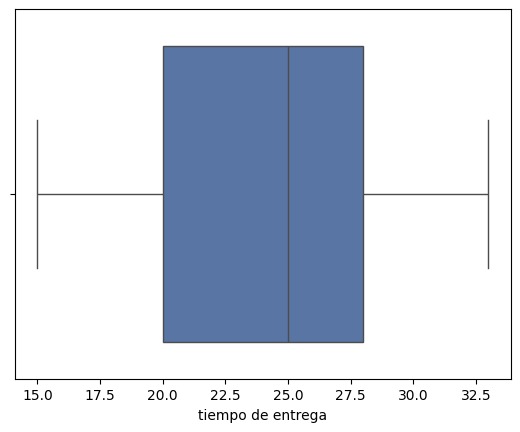

In [18]:
sns.histplot(
    data=foodhub_orders_data,
    x="delivery_time",
    color=sns.color_palette("deep")[0],
)
plt.ylabel("número de ordenes")
plt.xlabel("tiempo de entrega")
plt.show()

sns.boxplot(
    data=foodhub_orders_data,
    x="delivery_time",
    color=sns.color_palette("deep")[0],
)
plt.xlabel("tiempo de entrega")
plt.show()

#### Restaurantes

### 🧪 Ejercicio 4

👉 Da el top 5 de restaurantes según número de órdenes

In [19]:
restaurant_order_counts.head(n=5)

restaurant_name
Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: count, dtype: int64

## 📈 4. Análisis Bivariado

### ➤ Preparación vs Entrega

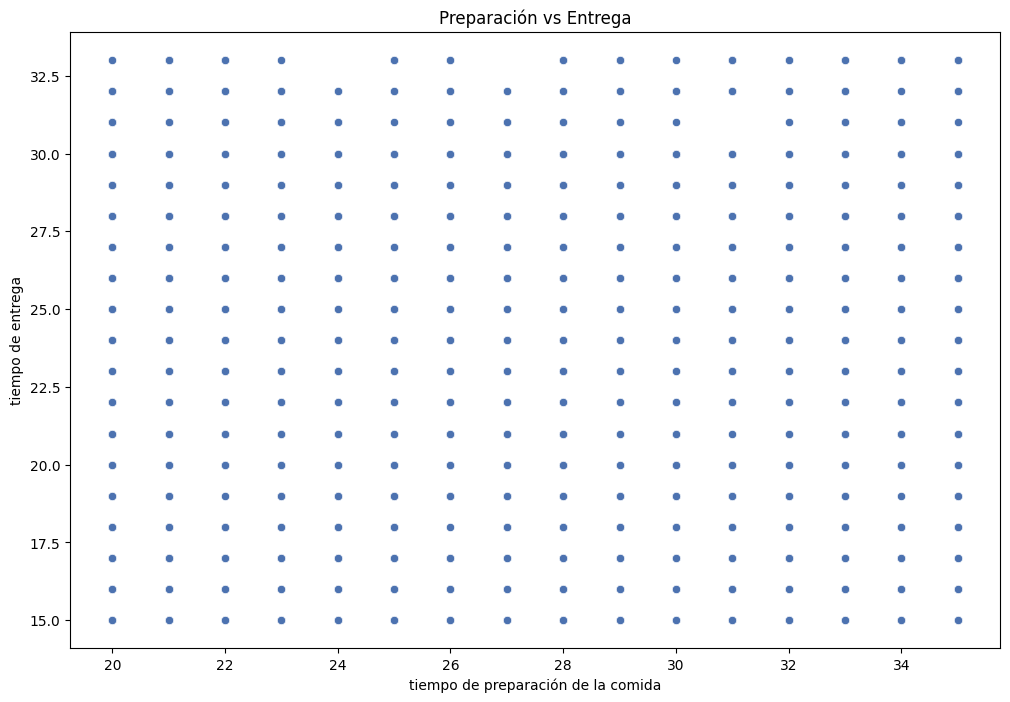

In [20]:
plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=foodhub_orders_data,
    x="food_preparation_time",
    y="delivery_time",
    color=sns.color_palette("deep")[0],
)
plt.title("Preparación vs Entrega")
plt.xlabel("tiempo de preparación de la comida")
plt.ylabel("tiempo de entrega")
plt.show()

Preparación y tiempo de entrega no parecen estar correlacionados.

### ➤ Costo por Día de la Semana

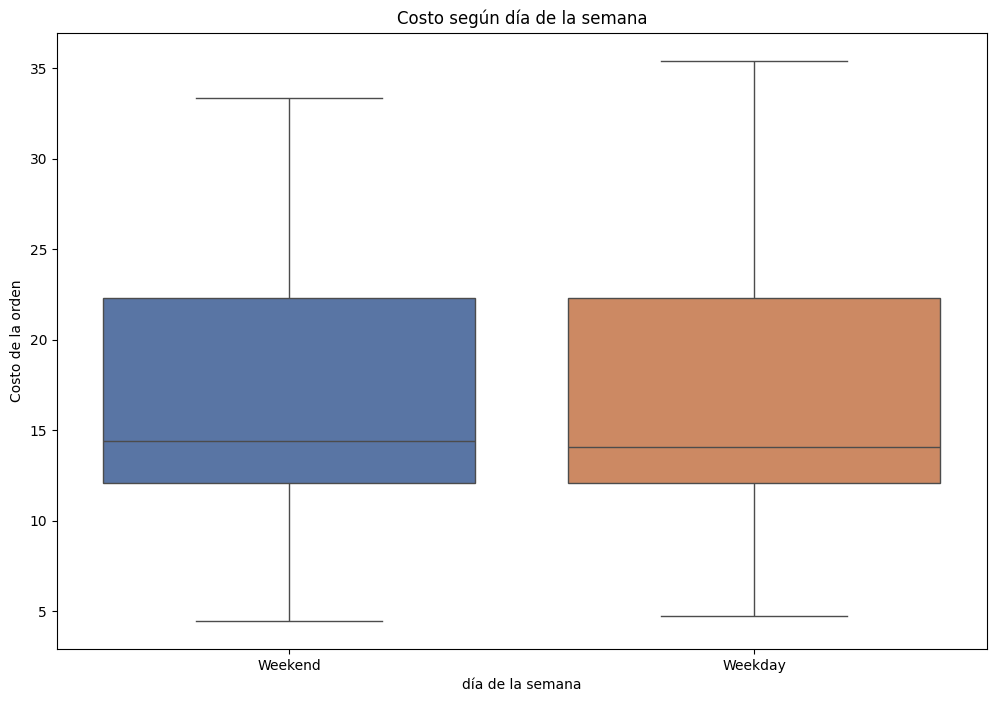

In [21]:
plt.figure(figsize=(12, 8))
sns.boxplot(
    data=foodhub_orders_data,
    x="day_of_the_week",
    y="cost_of_the_order",
    hue="day_of_the_week",
    palette="deep",
)
plt.title("Costo según día de la semana")
plt.ylabel("Costo de la orden")
plt.xlabel("día de la semana")
plt.show()

No parece que haya una correlación entre el costo y el día de la semana, pues las distribuciones son sumamente similares.

### 🧪 Ejercicio 5

👉 Que Tipo de cocina es más popular los fines de semana

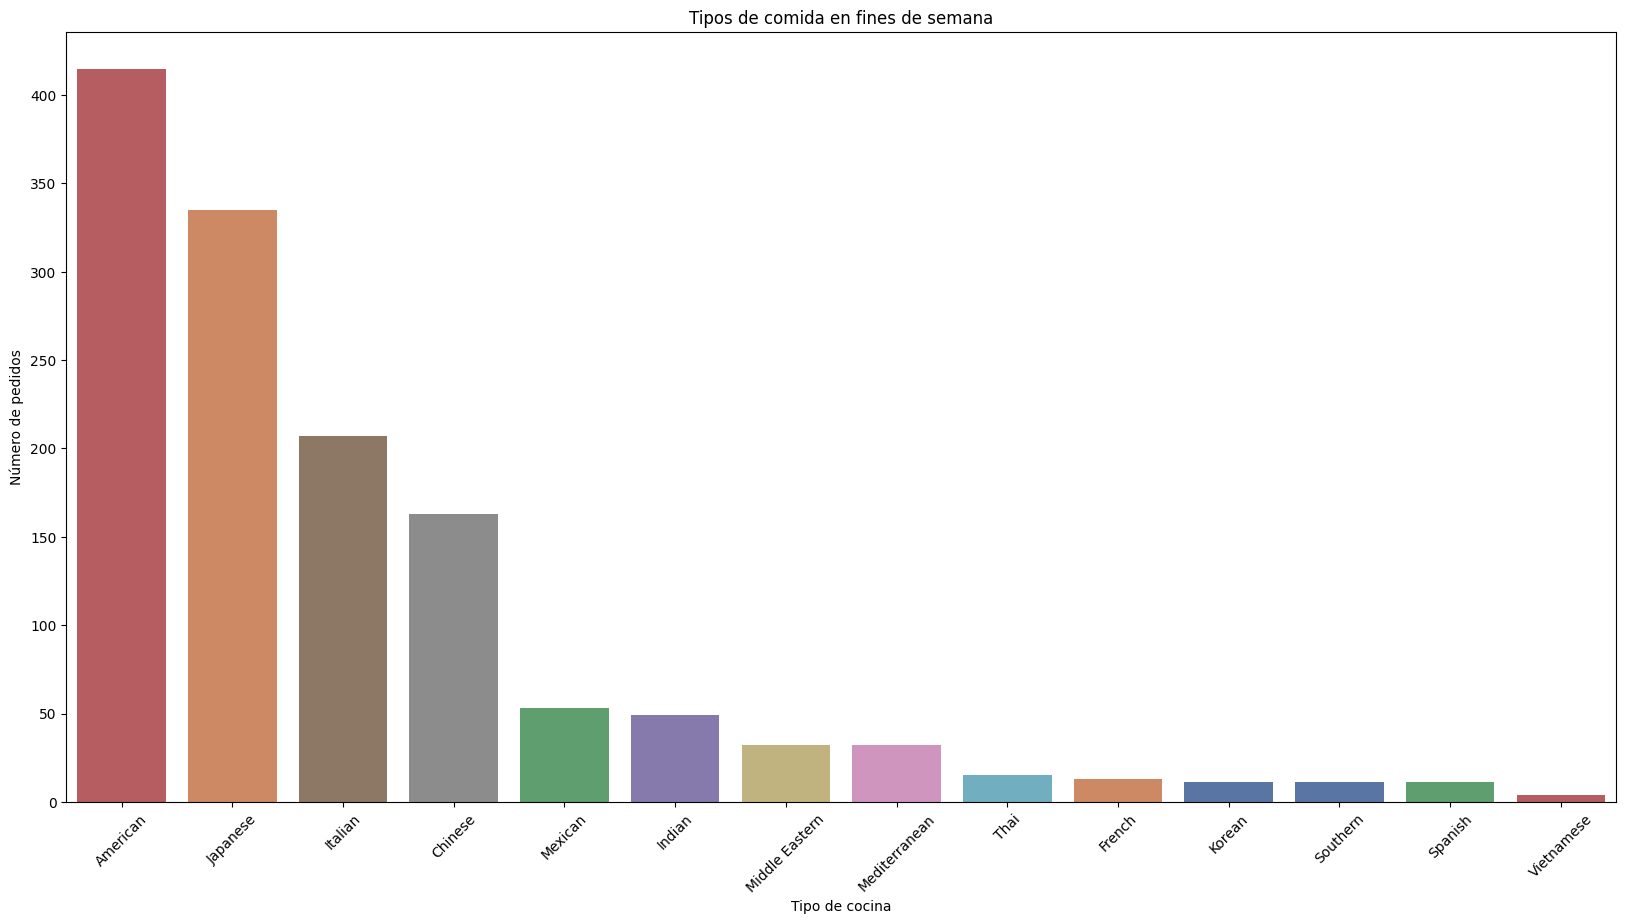

In [22]:
cuisine_types = list(foodhub_orders_data["cuisine_type"].unique())
palette_colors = sns.color_palette("deep", n_colors=len(cuisine_types))
cuisine_color_map = dict(zip(cuisine_types, palette_colors))
# Escribe aquí tu respuesta
weekend_orders = foodhub_orders_data[
    foodhub_orders_data["day_of_the_week"] == "Weekend"
]
plt.figure(figsize=(20, 10))

bar_order = weekend_orders["cuisine_type"].value_counts().index
sns.countplot(
    data=weekend_orders,
    x="cuisine_type",
    hue="cuisine_type",
    order=bar_order,
    palette=cuisine_color_map,
)
plt.title("Tipos de comida en fines de semana")
plt.ylabel("Número de pedidos")
plt.xlabel("Tipo de cocina")
plt.xticks(rotation=45)
plt.show()

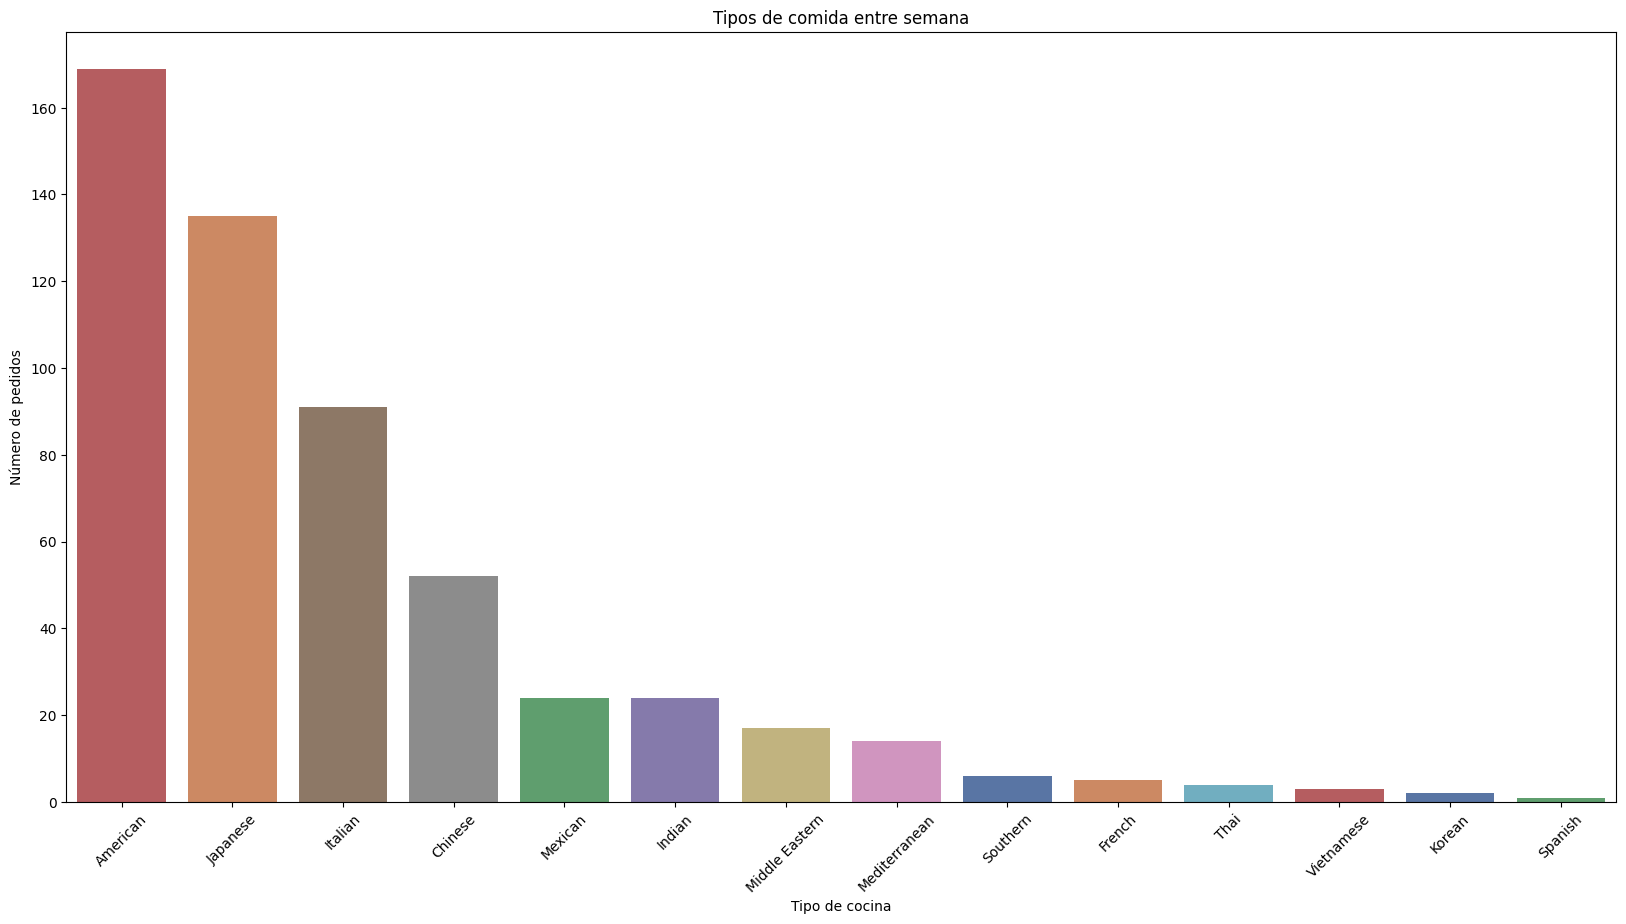

In [23]:
weekday_orders = foodhub_orders_data[
    foodhub_orders_data["day_of_the_week"] == "Weekday"
]
plt.figure(figsize=(20, 10))
bar_order = weekday_orders["cuisine_type"].value_counts().index
sns.countplot(
    data=weekday_orders,
    x="cuisine_type",
    hue="cuisine_type",
    order=bar_order,
    palette=cuisine_color_map,
)
plt.title("Tipos de comida entre semana")
plt.ylabel("Número de pedidos")
plt.xlabel("Tipo de cocina")
plt.xticks(rotation=45)
plt.show()

El día de la semana no parece tener un efecto enorme en los tipos de cocina de las ordenes

### 🧪 Ejercicio 6

👉 Visualiza la distribución de calificaciones (`rating`) por tipo de cocina.

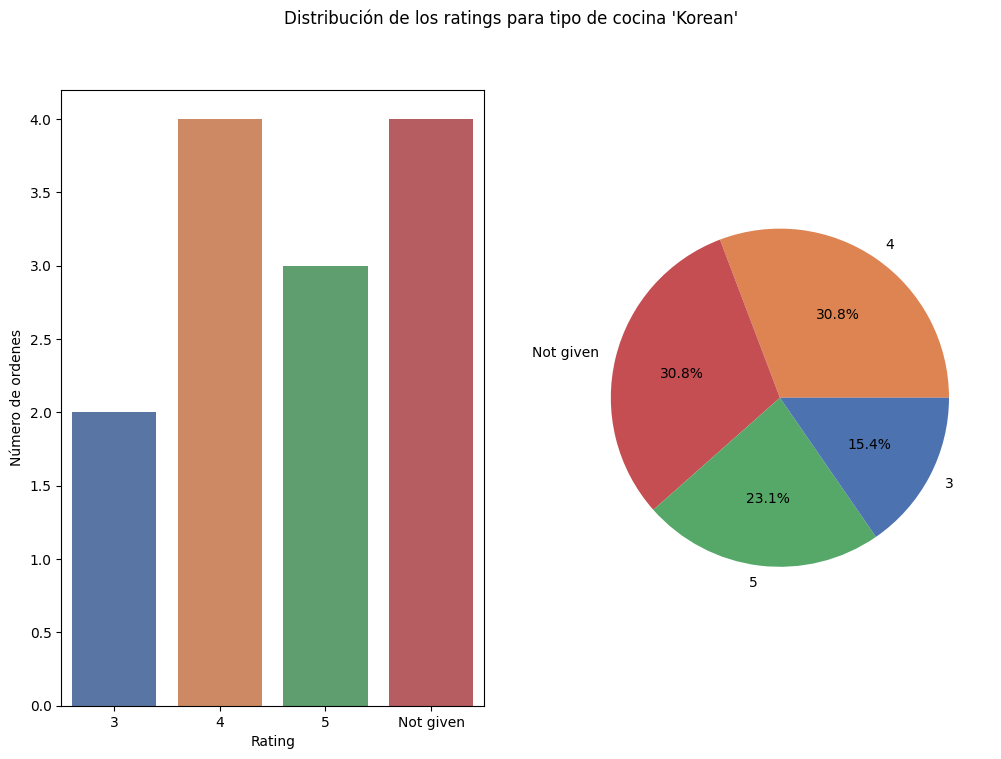

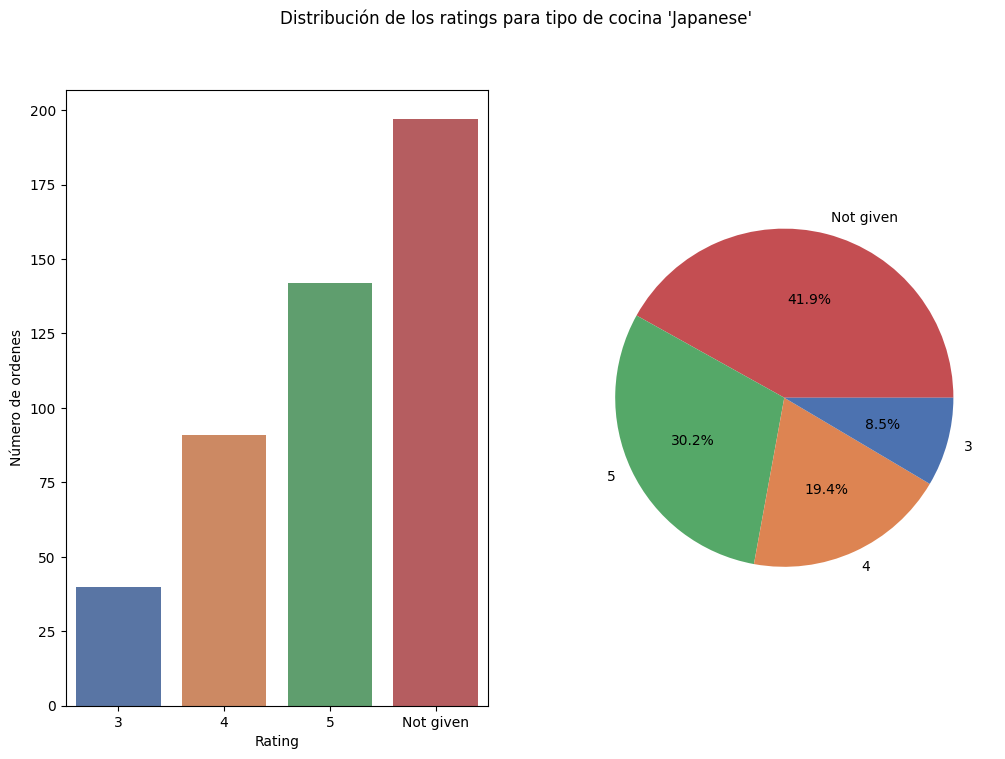

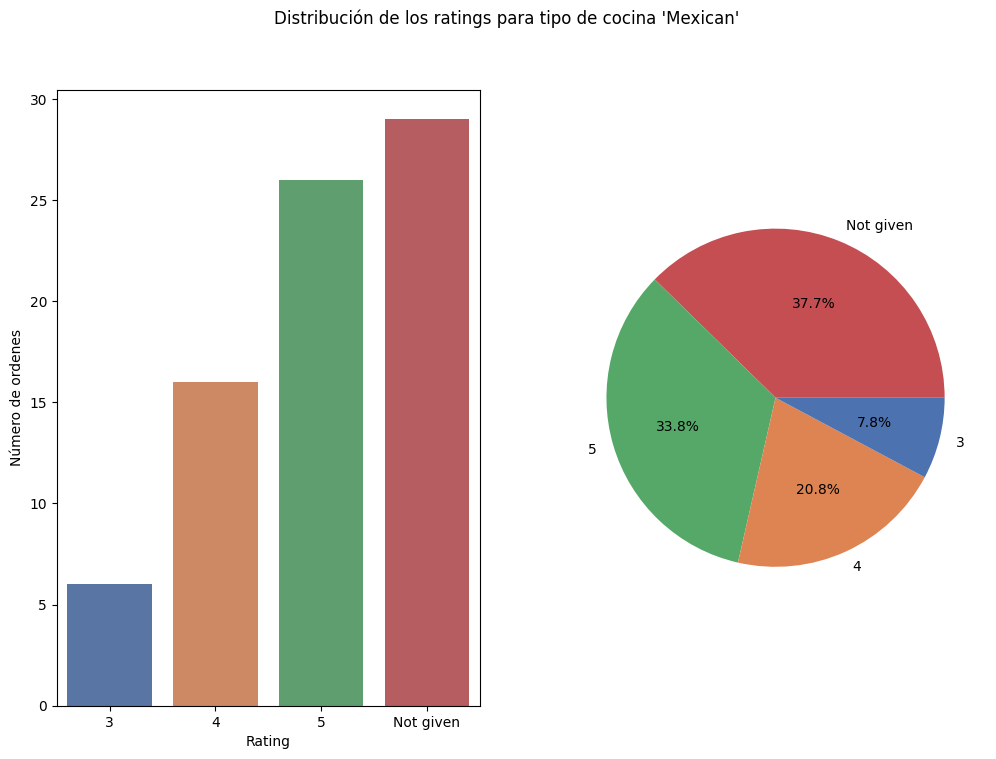

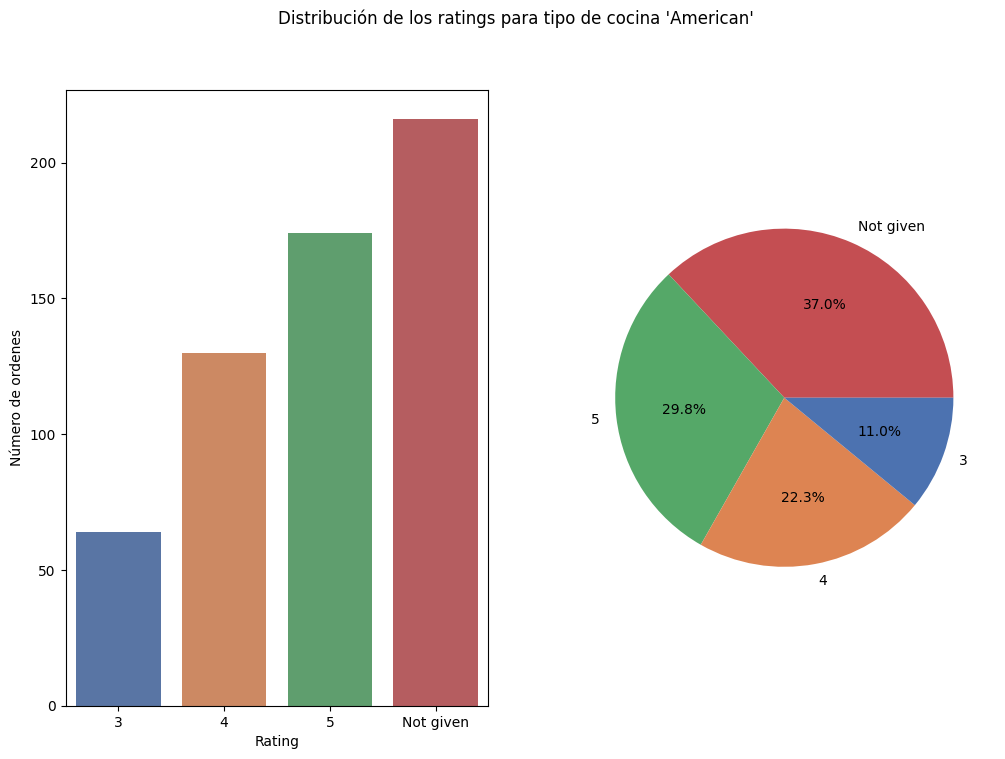

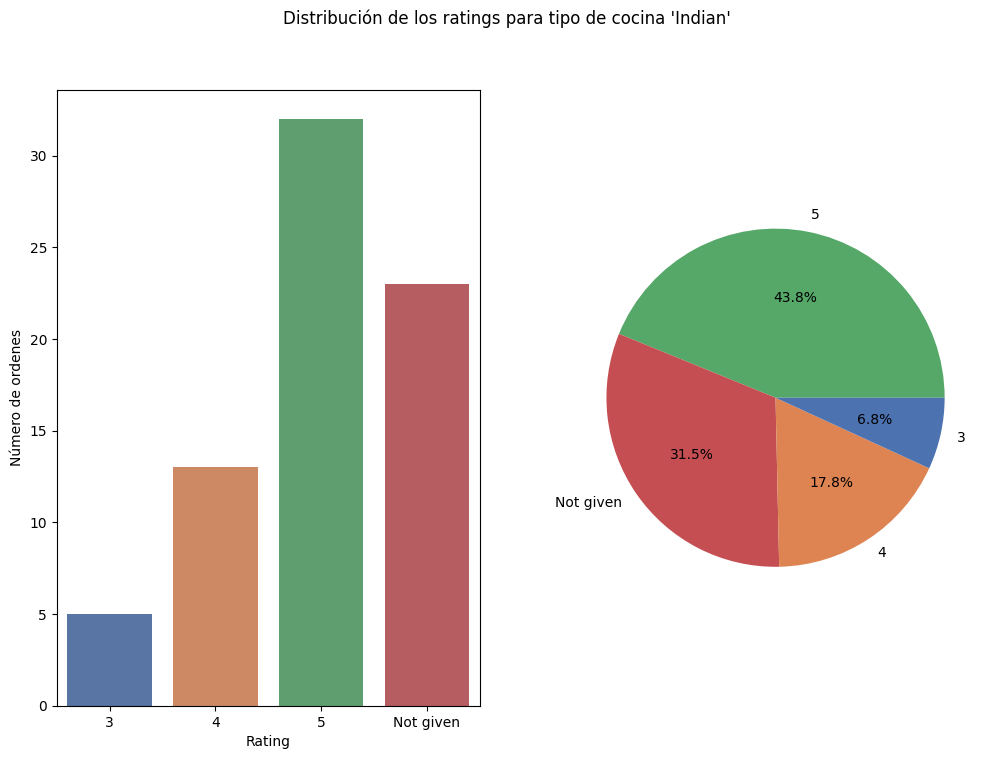

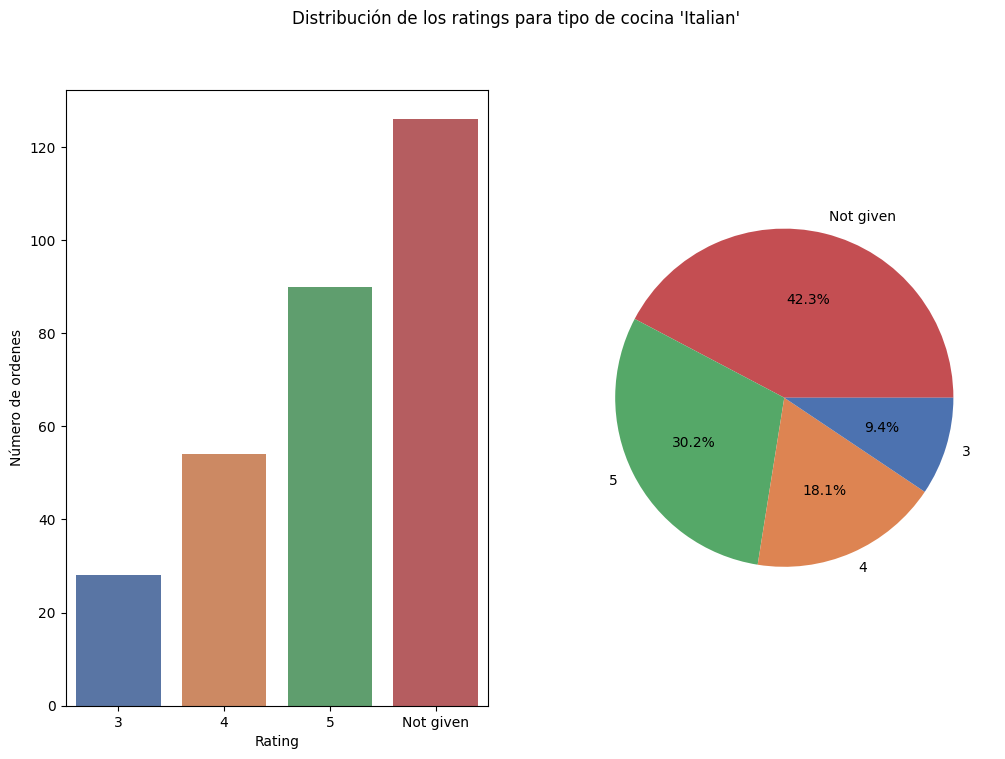

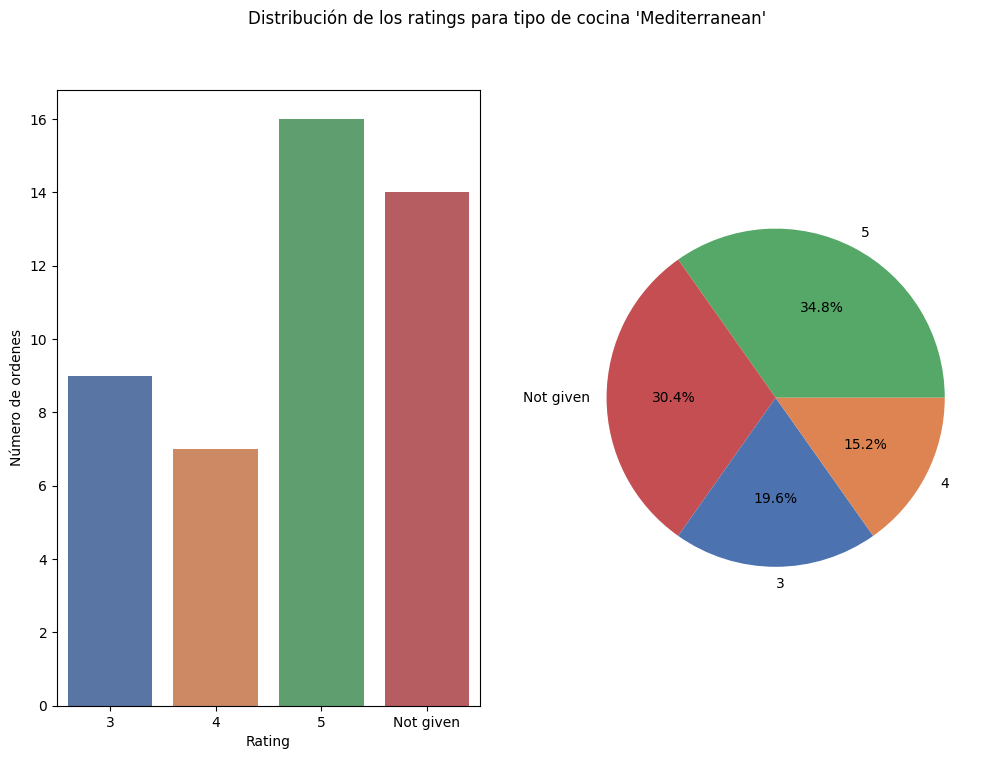

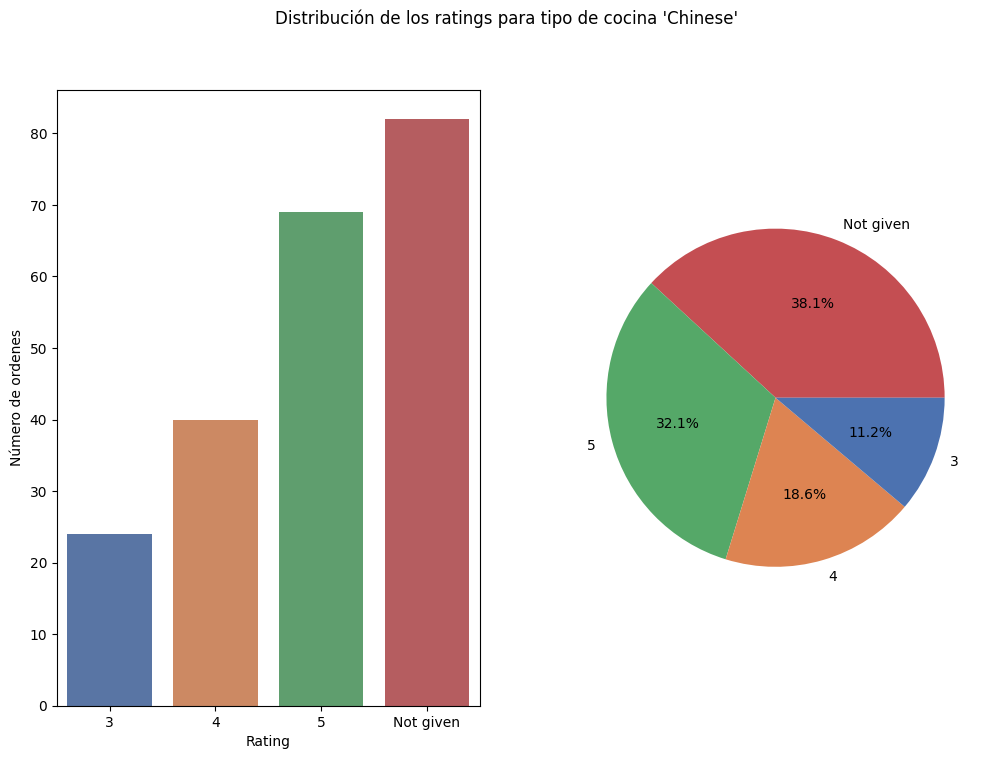

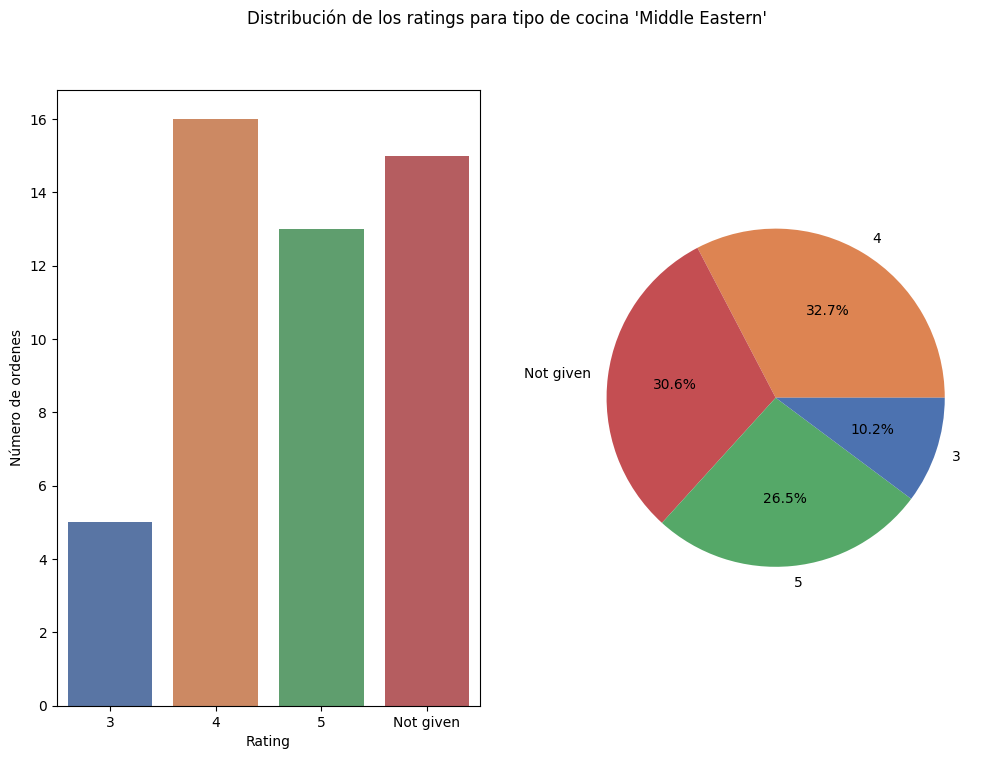

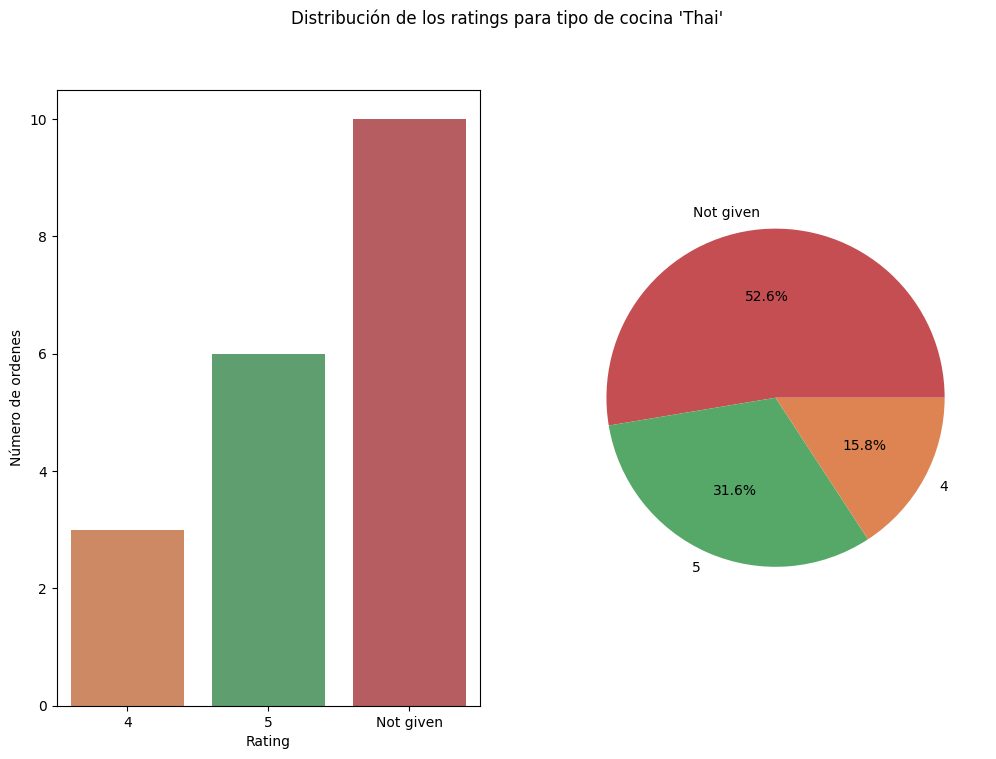

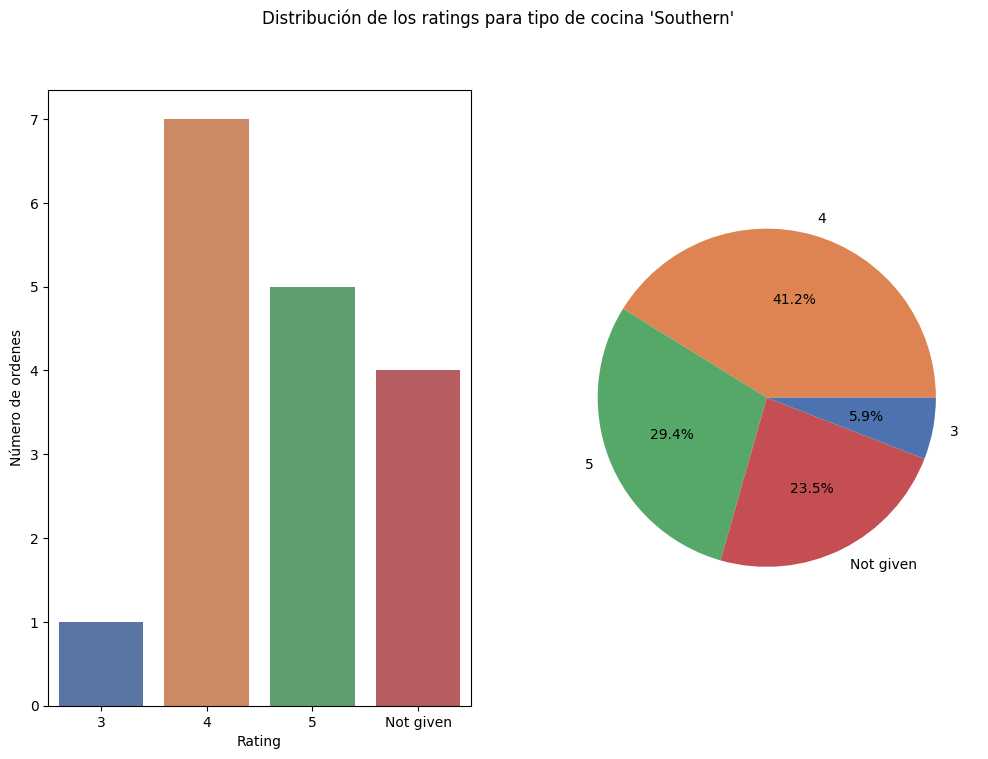

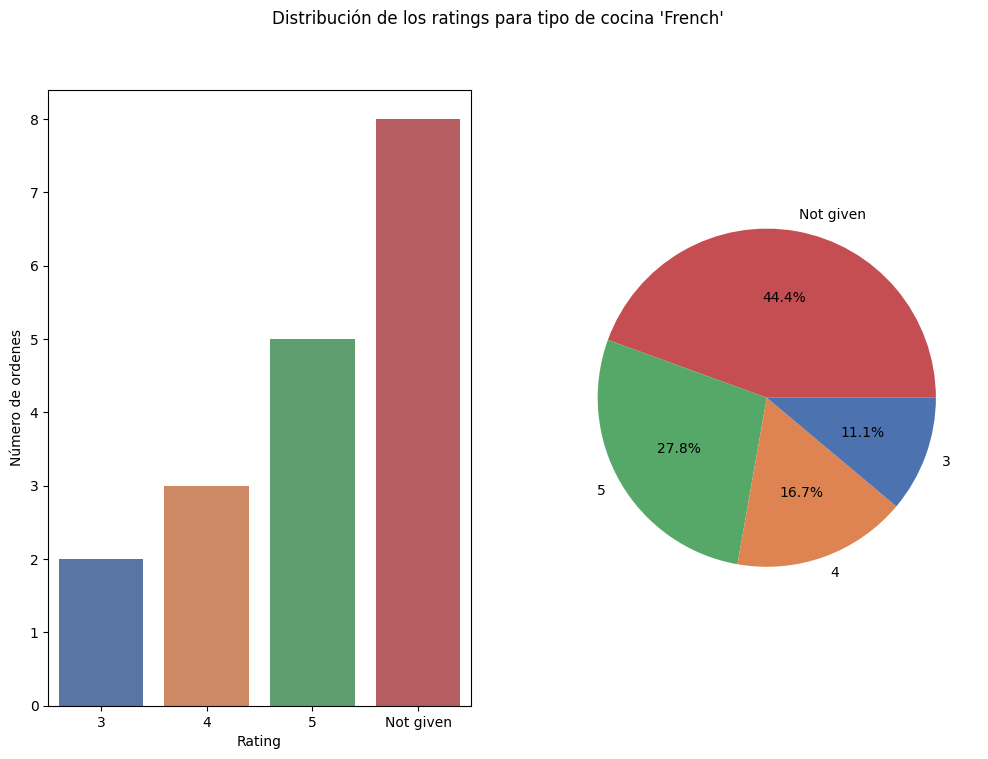

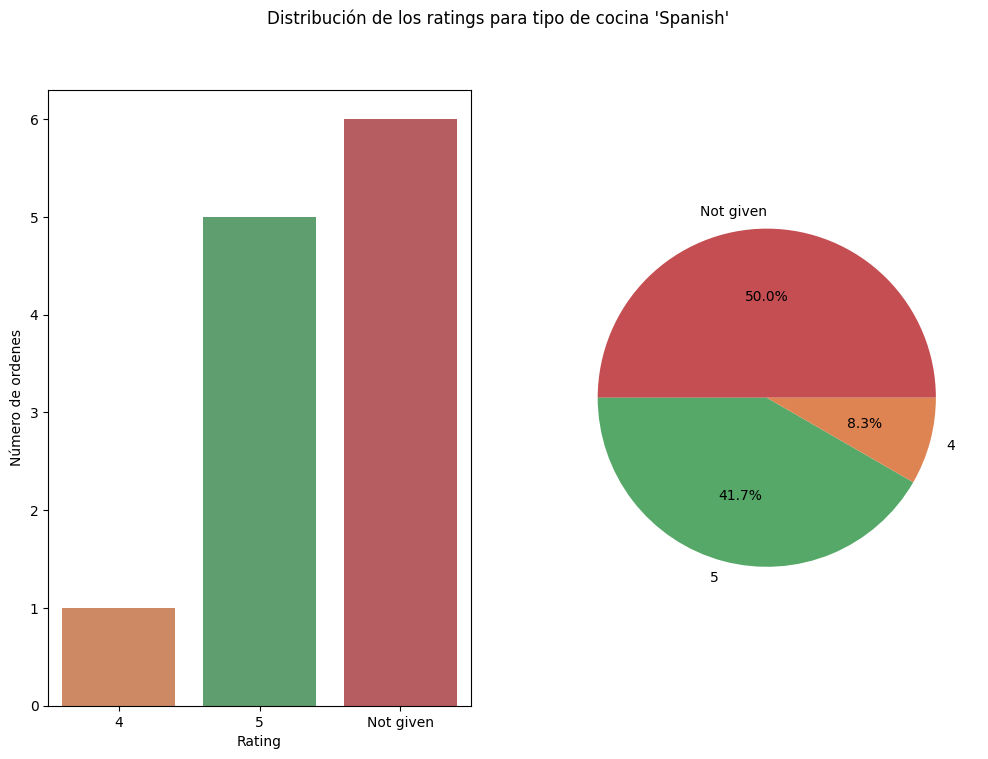

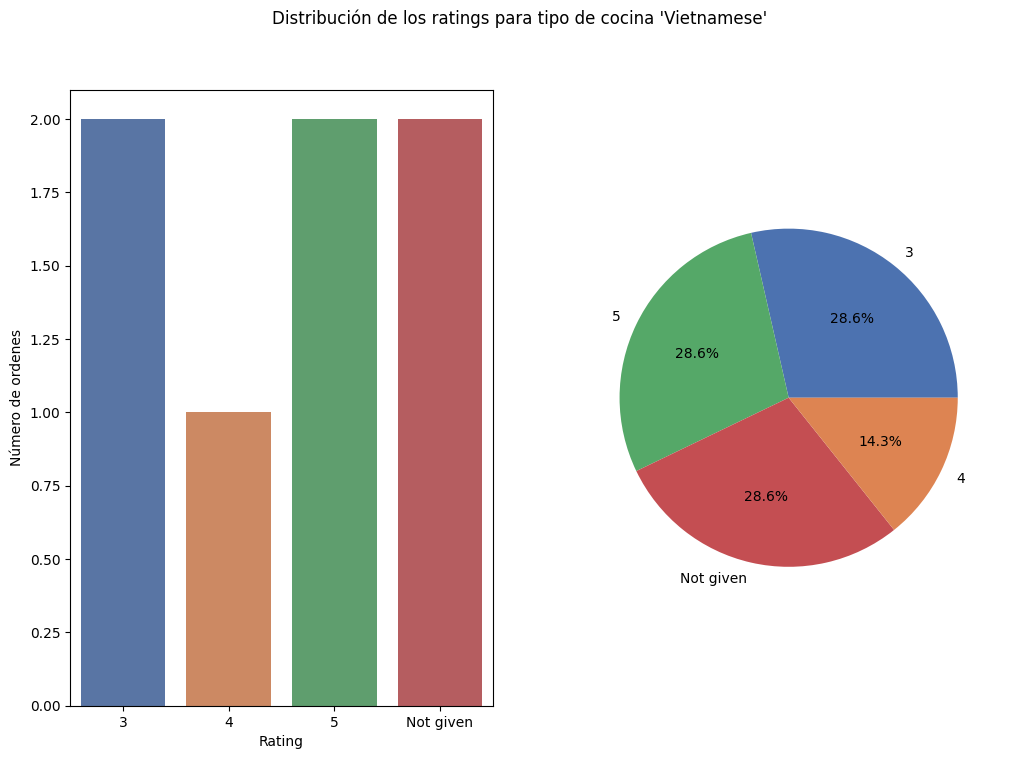

In [24]:
# Escribe tu código aquí
rating_categories = ["3", "4", "5", "Not given", "1", "2"]
palette_colors = sns.color_palette("deep", n_colors=len(rating_categories))
rating_color_map = dict(zip(rating_categories, palette_colors))
for i in range(1, 6):
    rating_color_map[i] = rating_color_map[str(i)]

for cuisine_type in cuisine_types:
    data = foodhub_orders_data[
        foodhub_orders_data["cuisine_type"] == cuisine_type
    ].sort_values(by="rating")

    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 8))
    fig.suptitle(f"Distribución de los ratings para tipo de cocina '{cuisine_type}'")
    sns.countplot(
        data=data,
        x="rating",
        hue="rating",
        palette=rating_color_map,
        ax=axes[0],
    )
    axes[0].set_ylabel("Número de ordenes")
    axes[0].set_xlabel("Rating")

    rating_counts = data["rating"].value_counts()
    pie_colors = [rating_color_map[rating] for rating in rating_counts.index]

    rating_counts.plot(
        kind="pie",
        autopct="%1.1f%%",  # to add labels to the chard
        colors=pie_colors,
        ax=axes[1],
    )
    axes[1].set_ylabel("")
    plt.show()

## 📉 5. Análisis Multivariado

In [25]:
# Correlación de variables numéricas
foodhub_orders_data[
    ["delivery_time", "food_preparation_time", "cost_of_the_order"]
].corr()

,delivery_time,food_preparation_time,cost_of_the_order
delivery_time,1.000000,0.011094,-0.029949
food_preparation_time,0.011094,1.000000,0.041527
cost_of_the_order,-0.029949,0.041527,1.000000


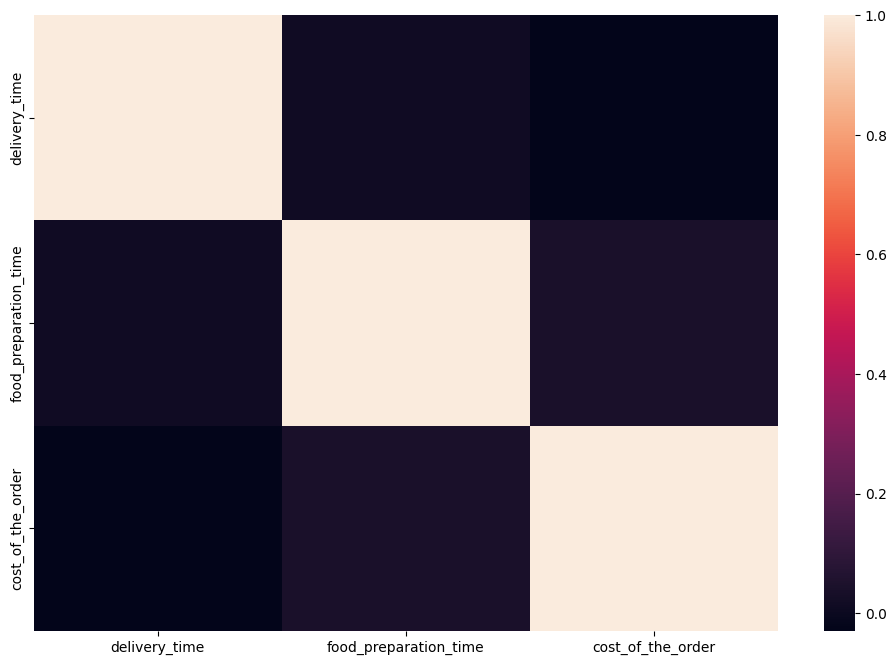

In [26]:
# ver correlación con un heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(
    foodhub_orders_data[
        ["delivery_time", "food_preparation_time", "cost_of_the_order"]
    ].corr(),
)
plt.show()

Muy baja la correlación entre las variables númericas

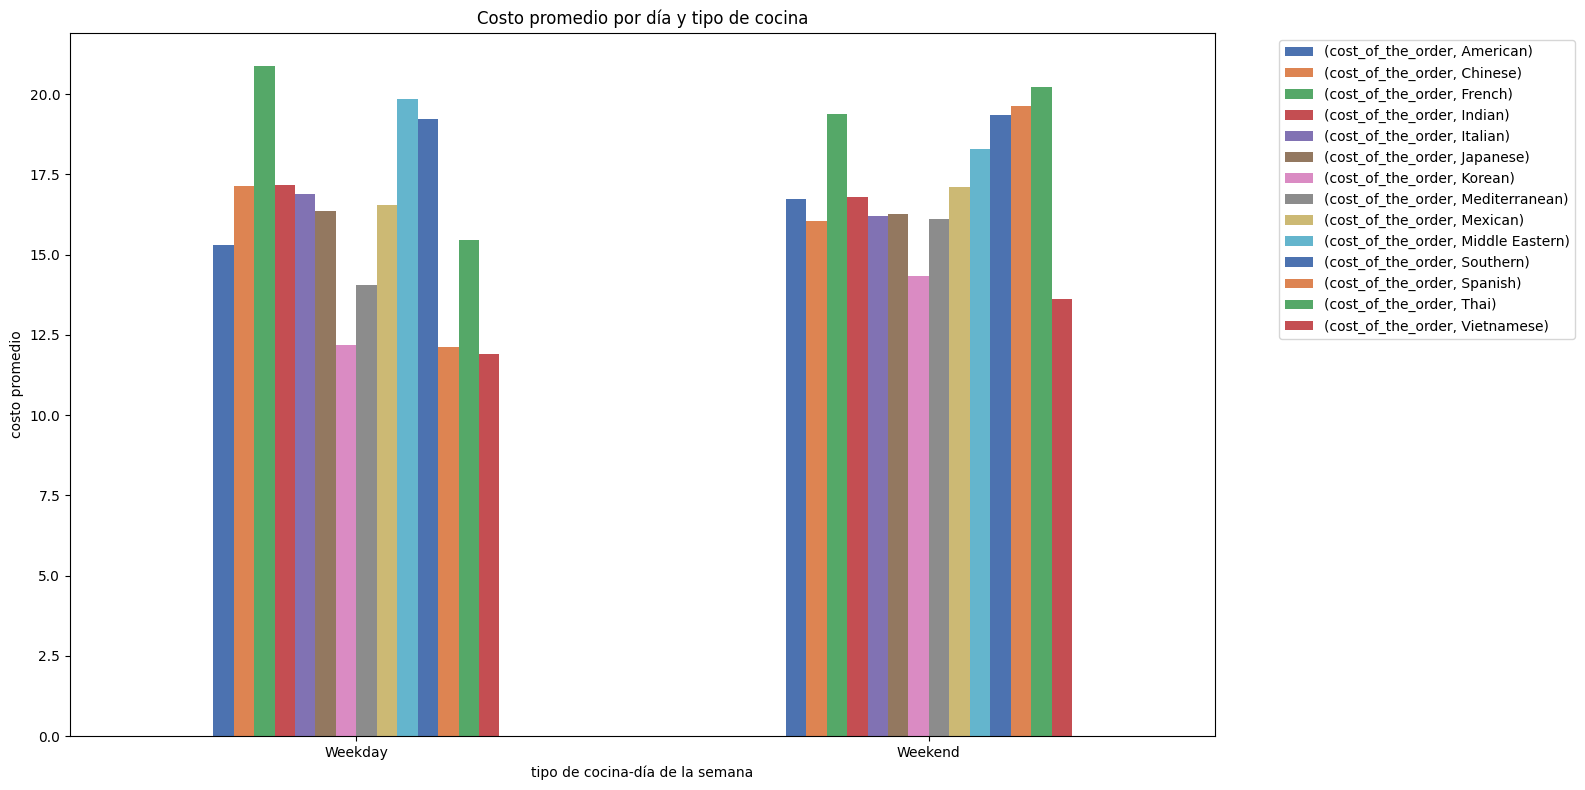

cost_of_the_order                                              \
cuisine_type             American    Chinese     French     Indian    Italian   
day_of_the_week                                                                 
Weekday                 15.308343  17.147692  20.866000  17.162500  16.890110   
Weekend                 16.731735  16.036442  19.381538  16.800816  16.211449   

                                                                               \
cuisine_type      Japanese     Korean Mediterranean    Mexican Middle Eastern   
day_of_the_week                                                                 
Weekday          16.368074  12.180000       14.0400  16.555833      19.832941   
Weekend          16.278925  14.332727       16.1025  17.103962      18.282812   

                                                             
cuisine_type      Southern    Spanish       Thai Vietnamese  
day_of_the_week                                              
Weekday          19.226667  12.130000  15.462500  11.916667  
Weekend          19.340909  19.618182  20.206667  13.607500

In [ ]:
def make_bar_plot_grouping_categorical_and_averaging_numerical(
    data: pd.DataFrame,
    categorical_cols: list[str],
    numerical_col: str,
    title: str,
    labels: tuple[str, str],
    x_label_rotation: int = 0,
    legends_title: str = "",
) -> pd.DataFrame:
    grouped = data.groupby(categorical_cols)[[numerical_col]].mean().unstack()
    grouped.plot(
        kind="bar",
        figsize=(16, 8),
        color=sns.color_palette("deep"),
    )
    plt.title(title)
    plt.xlabel(labels[0])
    plt.ylabel(labels[1])
    plt.xticks(rotation=x_label_rotation)
    plt.legend(
        title=legends_title,
        bbox_to_anchor=(1.05, 1),
        loc="upper left",
    )
    plt.tight_layout()
    plt.show()
    return grouped


make_bar_plot_grouping_categorical_and_averaging_numerical(
    data=foodhub_orders_data,
    categorical_cols=["day_of_the_week", "cuisine_type"],
    numerical_col="cost_of_the_order",
    labels=("tipo de cocina-día de la semana", "costo promedio"),
    title="Costo promedio por día y tipo de cocina",
)

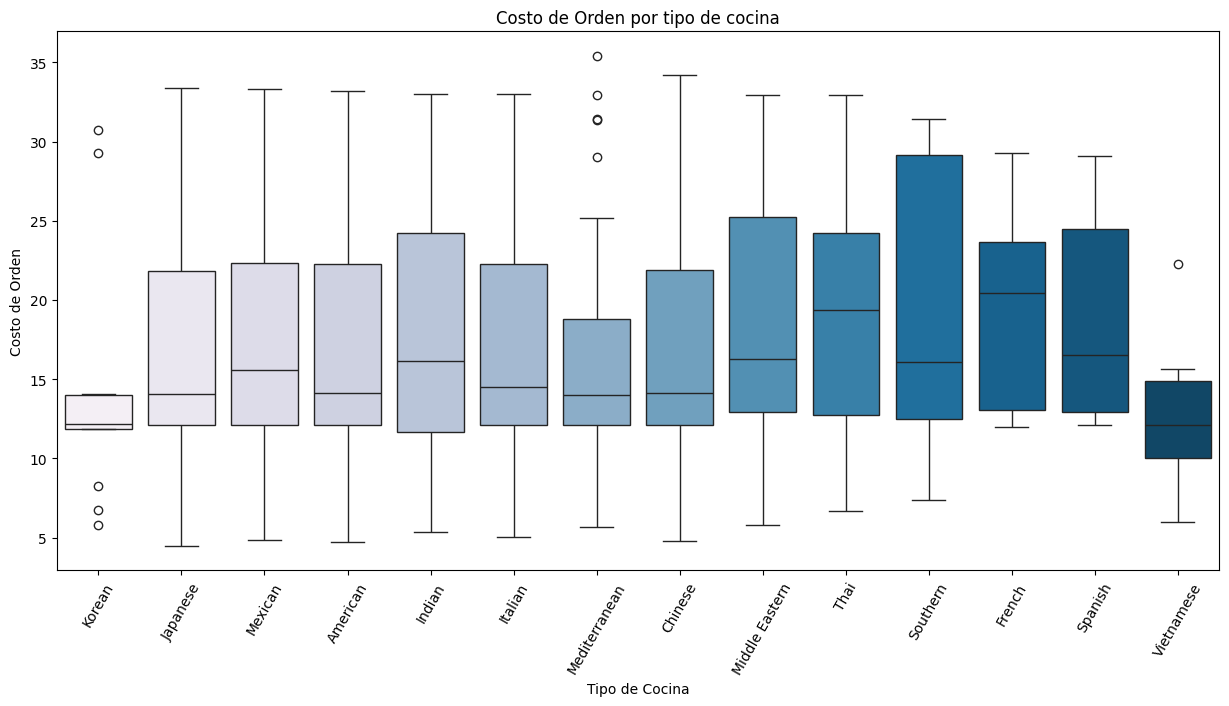

In [ ]:
# Relación entre costo de la orden y tipo de cocina

plt.figure(figsize=(15, 7))
plt.title("Costo de Orden por tipo de cocina")
sns.boxplot(
    x="cuisine_type",
    y="cost_of_the_order",
    data=foodhub_orders_data,
    palette="PuBu",
    hue="cuisine_type",
)
plt.xlabel("Tipo de Cocina")
plt.ylabel("Costo de Orden")
plt.xticks(rotation=60)
plt.show()

La comida francesa parece ser en promedio la más cara, aunque no es la que tiene los máximos mayores, y la vietnamita las más barata.

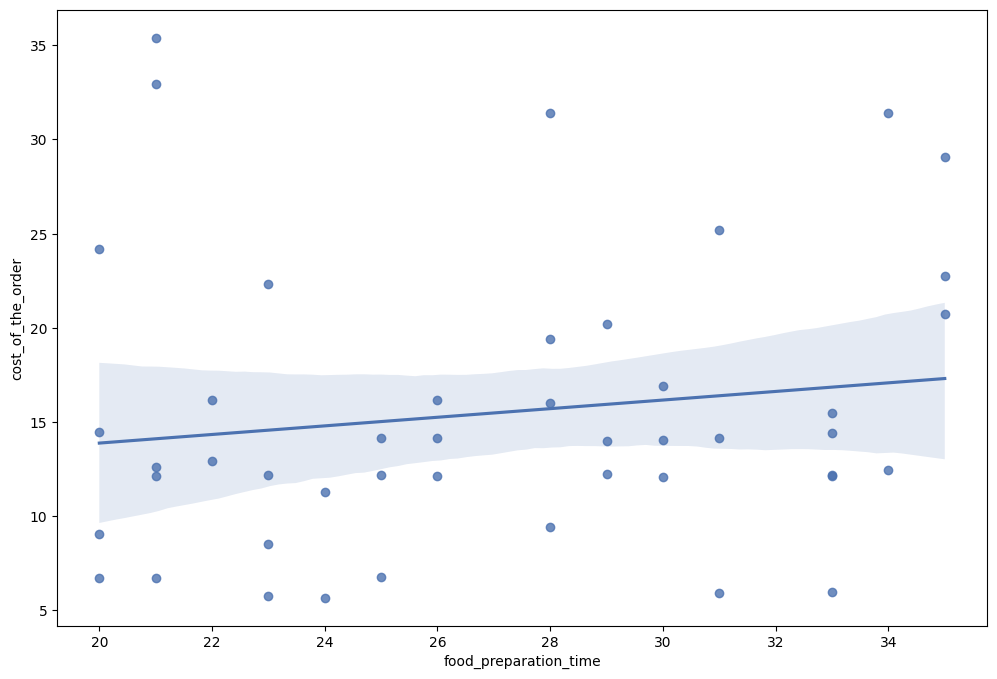

In [ ]:
# Ver distirvución de prepación de comida y costo de orden para la comida mediterránea
plt.figure(figsize=(12, 8))
sns.regplot(
    data=foodhub_orders_data[foodhub_orders_data["cuisine_type"] == "Mediterranean"],
    x="food_preparation_time",
    y="cost_of_the_order",
    color=sns.color_palette("deep")[0],
)
plt.show()

Casi inexistente pero una ligera tendencia positiva entre el costo y el tiempo de entrega. Esto puede ser debido a que los pedidos más costosos son más grandes y requieren más tiempo para ser preparados y entregados.

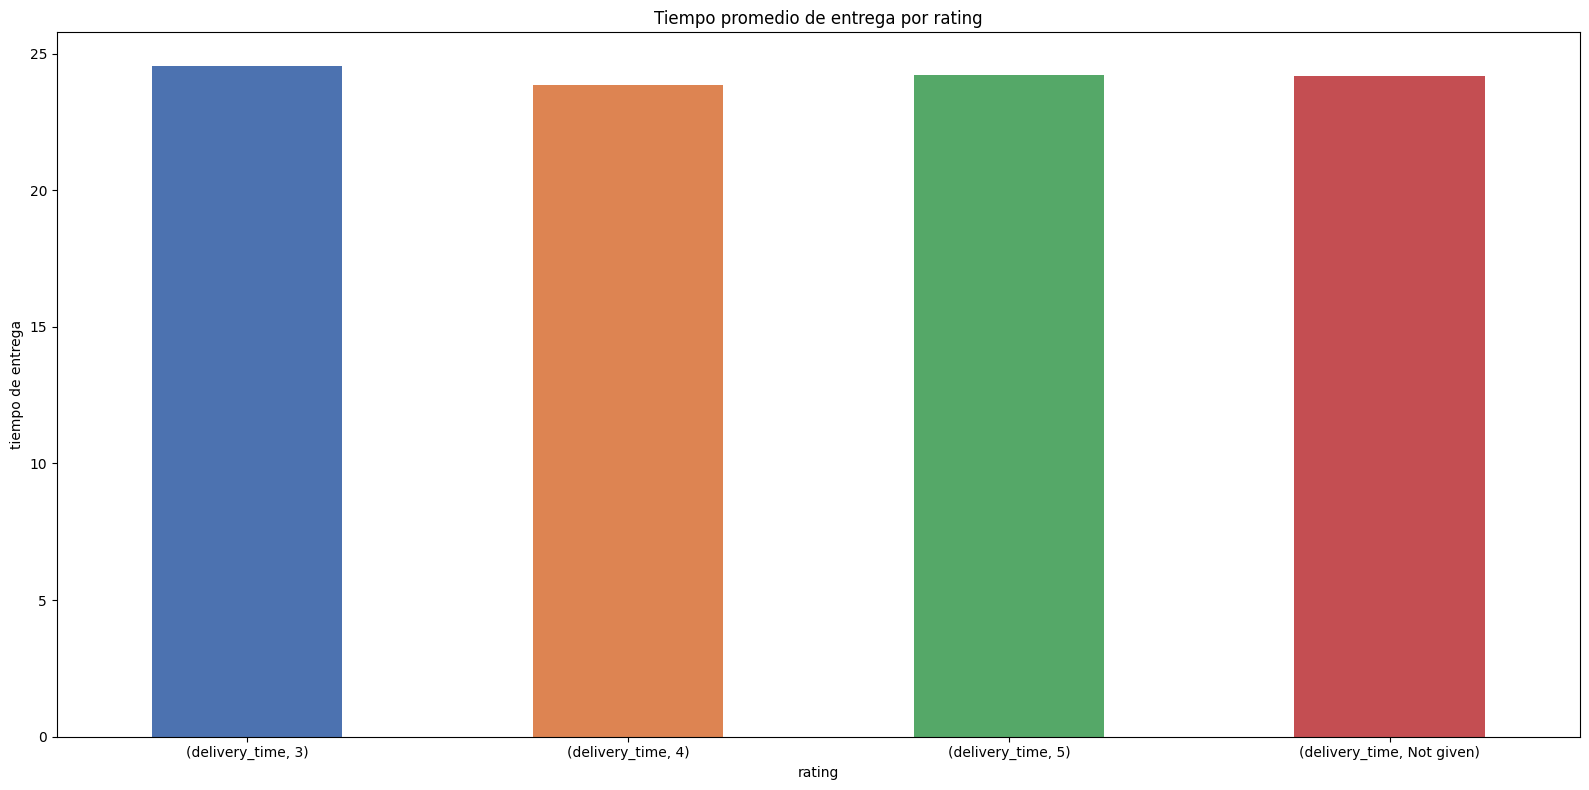

               rating   
delivery_time  3            24.558511
               4            23.867876
               5            24.212585
               Not given    24.173913
dtype: float64

In [ ]:
grouped = foodhub_orders_data.groupby(["rating"])[["delivery_time"]].mean().unstack()
grouped.plot(
    kind="bar",
    figsize=(16, 8),
    color=sns.color_palette("deep"),
)
plt.title("Tiempo promedio de entrega por rating")
plt.ylabel("tiempo de entrega")
plt.xticks(rotation=0)
plt.xlabel("rating")

plt.tight_layout()  # Ajusta el espacio para evitar recortes

plt.show()
grouped

### 🧪 Ejercicio 7

👉 Visualiza la relación entre el tipo de cocina y el tiempo de preparación


In [ ]:
# Escribe respuesta aquí

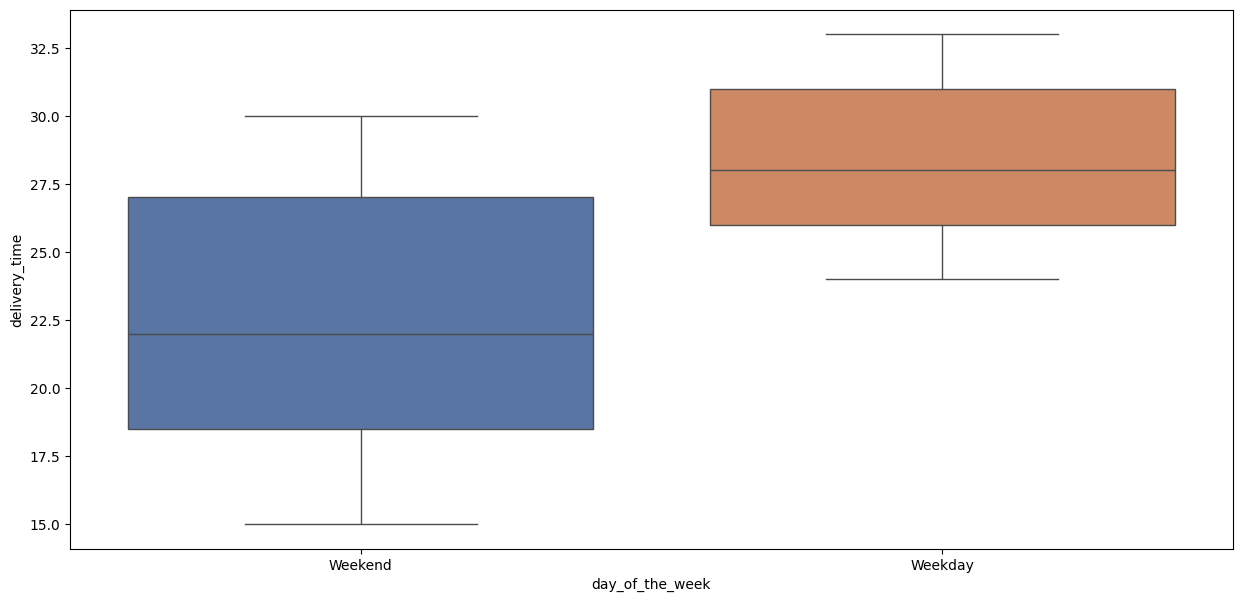

In [ ]:
# Relación entre el día de la semana y el tiempo de entrega
plt.figure(figsize=(15, 7))
sns.boxplot(
    data=foodhub_orders_data,
    x="day_of_the_week",
    y="delivery_time",
    hue="day_of_the_week",
    palette="deep",
)
plt.show()

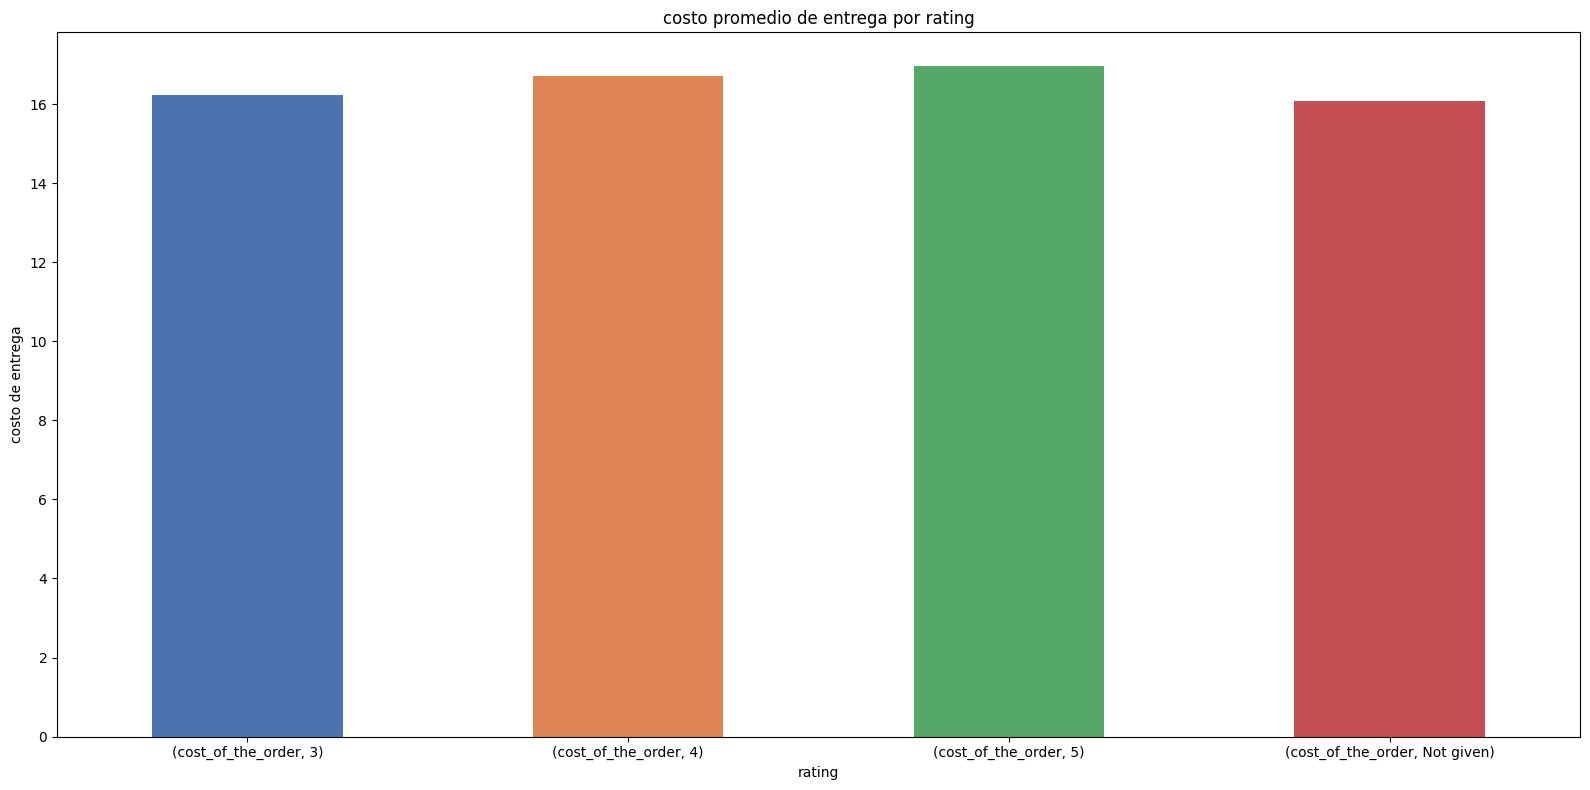

                   rating   
cost_of_the_order  3            16.223351
                   4            16.710337
                   5            16.965697
                   Not given    16.085340
dtype: float64

In [ ]:
grouped = (
    foodhub_orders_data.groupby(["rating"])[["cost_of_the_order"]].mean().unstack()
)
grouped.plot(
    kind="bar",
    figsize=(16, 8),
    color=sns.color_palette("deep"),
)
plt.title("costo promedio de entrega por rating")
plt.ylabel("costo de entrega")
plt.xticks(rotation=0)
plt.xlabel("rating")

plt.tight_layout()  # Ajusta el espacio para evitar recortes

plt.show()
grouped

Parece que los días entre semana los pedidos duaran más en entregarse

## ✅ 7. Conclusiones

Responde las siguientes preguntas

**7.1** - ¿Qué tipos de cocina son más comunes?


*r/* Americana, japonesa, italiana y china siempre están entre los primeros 5 tipos de cocina.


**7.2** - ¿Existen días con pedidos más costosos?


*r/* Algunos tipos de comida, como Thai y Española parecen ser más costosas los fines de semana. Esto puede deberse a que los fines de semana la gente suele pedir más comida para compartir, lo que puede aumentar el costo total del pedido. Curiosamente, no es una tendencia que se observe en todos los tipos de comida.


**7.3** - ¿Hay relación entre tiempos de entrega y preparación?


*r/* No parece haber una relación entre tiempos de preparación y entrega en el gráfico de disperción.


**7.4** - ¿Hay relación entre el rating y los tiempos de entrega y preparación?


*r/* No parece haber una relación entre el rating y los tiempos de entrega y preparación en el gráfico de disperción.


**7.5** - ¿Hay relación entre el rating y el costo de la orden?


**7.6** - La empresa desea ofrecer una promoción publicitaria para ciertos restaurantes. La condición para acceder a esta oferta es que:

* El restaurante debe tener más de 50 calificaciones (ratings), y

* La calificación promedio debe ser mayor a 4.

  ¿Cuáles restaurantes cumplen con estos criterios para recibir la oferta promocional?

**7.7** - La empresa cobra a los restaurantes una comisión del 25% en los pedidos cuyo costo sea mayor a 20 dólares, y una comisión del 15% en los pedidos con un costo mayor a 5 dólares.

  Calcula el ingreso neto total generado por la empresa a partir de todos los pedidos.

**7.8** - Brinda tres recomendaciones a la empresa sobre cómo puede aumentar sus ganancias.
